# MACHINE LEARNING MODEL FOR PREDICTING RESIDENTIAL PROPERTY MARKET VALUE IN PHILADELPHIA, UNITED STATES
## By : Team Omega
## Members :
1. Andika Kristianto
2. Erlangga Hario Roesdyoko
3. Remir Joseph Eklou

[Philadelphia Buildings Database](https://www.kaggle.com/datasets/adebayo/philadelphia-buildings-database) 

# **Content**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing & Cleaning 
4. Exploratory Data Analysis
5. Data Preparation & Feature Engineering
6. Modeling
7. Conclusion
8. Recommendation

****

# **1. Business Problem Understanding**

## Context

Philadelphia is the largest city in the Commonwealth of Pennsylvania, United States (U.S.). According to the 2020 U.S. Census Bureau, 1,603,797 people were residing in the city [$^1$](https://en.wikipedia.org/wiki/Philadelphia). As a city which has shifted from a shrinking city to a growing one with an increased demand for housing, residents of Philadelphia are finding it increasingly difficult to find and secure affordable housing [$^2$](https://bit.ly/3ZXDn2a). In 2018, 40% of Philadelphia households are cost-burdened because they spent at least 30% of their income on housing costs. The housing crisis in Philadelphia is worsened by the high poverty rate of the city causing low income communities to be the most severely impacted [$^3$](https://law.upenn.libguides.com/housing). Renters with incomes below USD30,000 per year are severely cost-burdened because they spend at least 50% of their income on housing [$^4$](https://bit.ly/42hICv5). Thus, these conditions show that houses are overpriced for a large group of households who live with a low income.

References
1. Wikipedia. (2023). Philadelphia Demographics. https://en.wikipedia.org/wiki/Philadelphia
2. Pew. (2020). The State of Housing Affordability in Philadelphia: Who’s cost-burdened—and why. https://bit.ly/3ZXDn2a
3.University of Pennsylvania Law School. (2022). The Philadelphia Housing Crisis. https://law.upenn.libguides.com/housing
4. The Legal Intelligencer. (2022).Affordable Housing Shortage in Philadelphia a Persistent Problem. https://bit.ly/42hICv5

## Problem Statement

A challenge for housing agents is *to determine an accurate property value which is profitable for business  as well as fair for buyers*. As a housing agent, there is a need to value properties optimally based on data to avoid an overpricing or underpricing tendency. It is also useful *to determine certain key characteristics which are important in determining an accurate and fair property value*.

## Goals 

Based on the identified problems, our client who is a housing agent needs a tool that can be used in predicting an accurate and fair market value of housing properties in Philadelphia. The price prediction will be based on the property characteristics provided by buyers. 

## Analytic Approach

The historical data of housing properties in Philadelphia will be analyzed to find patterns in the existing factors used in determining the market value of properties. Then, a regression model will be formulated to assist the housing agent in determining an accurate and fair property value.

## Metric Evaluation
The evaluation metrics that will be used include RMSE, MAE, and MAPE. The Root Mean Squared Error (RMSE) is the square root of the average squared error. The Mean Absolute Error (MAE) is a also used to measure forecast accuracy. As the name implies, it is the mean of the absolute error. The Mean Absolute Percentage Error (MAPE) is one of the most commonly used metric to measure forecast accuracy. MAPE is the sum of the individual absolute errors divided by the demand. It is the average of the percentage errors. A model with smaller RMSE, MAE, and MAPE value means that the model is more accurate in making predictions based on the limited features provided.
 

## Business Potential

The housing market itself has been declining since the pandemic, and it has not surpassed the pre pandemic market condition. As of February 2023, the number of houses sold in Philadelphia is down about 29.2% on a year on year basis[$^5$]( https://www.redfin.com/city/15502/PA/Philadelphia/housing-market). We believe by giving a fair and accurate price for a property based on the customer’s needs can increase the sale and close the year on year gap for the number of houses sold. Ultimately, the housing business can increase their revenue.

By closing the year on year gap, there will be about 400 houses sold in a month which leads to a USD4.5 million sales potential. (400 houses x median house price (225,000)[$^5$]( https://www.redfin.com/city/15502/PA/Philadelphia/housing-market)  x 0.05 (4-6% real estate commission)[$^6$](https://www.investopedia.com/financial-edge/0611/understanding-real-estate-commissions-who-pays.aspx) = USD4.5 million. 

References
5. Redfin. (2023). Philadelphia Housing Market. https://www.redfin.com/city/15502/PA/Philadelphia/housing-market
6. Investopedia. (2022). Who pays real estate fees? https://www.investopedia.com/financial-edge/0611/understanding-real-estate-commissions-who-pays.aspx

In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)

In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Final Project/PHL_OPA_PROPERTIES.csv')

<ipython-input-4-a61b1d5665fd>:2: DtypeWarning: Columns (0,3,10,18,41,52,59,66,67,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final Project/PHL_OPA_PROPERTIES.csv')


In [ ]:
# checking the first 5 rows in dataset
df.head()

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid
0,NaN,D,S W COR HOWARD,0.0,P50,ROW W/GAR 3 STY MASONRY,1,Single Family,700.0,N,NaN,NaN,49.0,113900.0,0.0,5.0,0.0,15.90,NaN,1.0,B,A,1.0,0.0,0,108,5.0,108 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,186800.0,NaN,2.0,4.0,7.0,0.0,0.0,NaN,PRUSMOWSKI CHARLES L,NaN,11000600,E,NaN,1951-01-31 00:00:00,009S170169,1951-01-31 00:00:00,1.0,NaN,NaN,B,1001.0,82740,ST,NaN,WHARTON,NaN,19064.0,53836.0,F,779.0,1650.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681921
1,NaN,D,15D94 W HOWARD ST,3209422.0,O50,ROW 3 STY MASONRY,1,Single Family,710.0,Y,NaN,NaN,49.0,0.0,0.0,2.0,0.0,15.90,NaN,0.0,0,A,1.0,0.0,0,110,2.0,110 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,341600.0,NaN,1.0,3.0,0.0,0.0,0.0,NaN,SCHMIDT KATHERINE JESSIE,HARRIGAN DEVIN JOHN,11000700,E,NaN,2017-05-09 00:00:00,009S170046,2017-04-14 00:00:00,395000.0,NaN,NaN,NaN,1001.0,82740,ST,NaN,WHARTON,NaN,256576.0,85024.0,F,779.1,1203.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681922
2,NaN,D,"30'51/2"" W HOWARD",0.0,O50,ROW 3 STY MASONRY,1,Single Family,700.0,N,NaN,NaN,49.0,45000.0,0.0,4.0,0.0,14.80,NaN,0.0,0,A,1.0,45000.0,0,112,4.0,112 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,226200.0,NaN,1.0,4.0,0.0,2.0,0.0,NaN,THOMAS J NICOLO,MARY JANE HUDICK,11000800,E,NaN,1975-09-04 00:00:00,009S170168,1975-09-04 00:00:00,1.0,NaN,NaN,NaN,1001.0,82740,ST,NaN,WHARTON,NaN,121936.0,59264.0,F,725.2,1482.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681923
3,NaN,D,"45'2"" W HOWARD ST",2448875.0,O50,ROW 3 STY MASONRY,1,Single Family,710.0,Y,NaN,NaN,100.0,36000.0,0.0,4.0,0.0,14.33,NaN,0.0,0,A,1.0,36000.0,0,114,4.0,114 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,241500.0,NaN,2.0,4.0,8.0,2.0,0.0,NaN,FITTER OWEN D,FITTER JACLYN D,11000900,E,NaN,2012-02-16 00:00:00,009S170129,2012-02-16 00:00:00,1.0,NaN,NaN,A,1001.0,82740,ST,NaN,WHARTON,NaN,142227.0,63273.0,F,1433.0,2049.0,A,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681924
4,NaN,C,"59'6"" W HOWARD ST",3245897.0,O50,ROW 3 STY MASONRY,1,Single Family,710.0,N,NaN,2013-07-16 00:00:00,100.0,45000.0,0.0,4.0,0.0,15.00,NaN,0.0,0,A,1.0,45000.0,0,116,4.0,116 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,237000.0,NaN,2.0,4.0,0.0,3.0,0.0,NaN,HUDRICK EUGENE J,HUDRICK ROBERT E,11001000,E,NaN,2017-07-31 00:00:00,009S170128,2017-07-21 00:00:00,1.0,NaN,NaN,A,1001.0,82740,ST,NaN,WHARTON,NaN,129906.0,62094.0,F,1500.0,1155.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681925


In [ ]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581456 entries, 0 to 581455
Data columns (total 75 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   assessment_date            133 non-null     object 
 1   basements                  325571 non-null  object 
 2   beginning_point            570284 non-null  object 
 3   book_and_page              578680 non-null  object 
 4   building_code              581456 non-null  object 
 5   building_code_description  581456 non-null  object 
 6   category_code              581456 non-null  int64  
 7   category_code_description  581456 non-null  object 
 8   census_tract               581456 non-null  float64
 9   central_air                285860 non-null  object 
 10  cross_reference            121018 non-null  object 
 11  date_exterior_condition    354149 non-null  object 
 12  depth                      581454 non-null  float64
 13  exempt_building            58

# **2. Data Understanding**

The dataset contains property characteristics, value and ownership information as documented by the Office of Property Assessment (OPA) in the City of Philadelphia until 2020. 

Data description source: [Metadata](https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/representationdetails/55d624fdad35c7e854cb21a4/?view_287_page=1)


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| 1. assessment_date | Object | The date assessment was last changed. This is only year month the day is zero, at this time. |
| 2. basements | Object | Type of Basement: <br/>0 = None - Indicates no basement. <br/>A = Full Finished - Occupies the entire area under the first floor. <br/>B = Full Semi-Finished - Could have some finish to include a floor covering, and ceiling. <br/>C = Full Unfinished - Is a typical basement with unfinished concrete floor. <br/>D = Full – Unknown Finish. <br/>E = Partial Finished - Occupies a portion under the first floor. <br/> F = Partial Semi-Finished - One or more finished areas. <br/>G = Partial Unfinished. <br/>H = Partial - Unknown Finish. <br/> I = Unknown Size - Finished.<br/>  J = Unknown Size - Unfinished. |
| 3. beginning_point | Object |  |
| 4. book_and_page  | Object | This shows the order documents were received. |
| 5. building_code  | Object | This is a five-character code. It is a mixture of letters (alpha) and/or numbers (numeric). <br/> The two low order digits are not used at this time. |
| 6. building_code_description   | Object | Structural type of the building. |
| 7. category_code | int64 | Category code of the building: <br/> 1. Residential<br/>2. Hotels and Apartments<br/>3. Store with Dwelling<br/>4. Commercial<br/>5. Industrial<br/>6. Vacant Land |
| 8. category_code_description   | Object |  |
| 9. census_tract   | float64 | Census tract is a defined area established by the Census Bureau. |
| 10. central_air   | Object | "Y" indicates there is central air. N - None. |
| 11. cross_reference    | Object | This is the last Account Number for transferred accounts. |
| 12. date_exterior_condition   | Object |  |
| 13. depth | float64 | The depth is measured from the principal street back to the rear property line or secondary street. <br/>In the case of different depths of parallel side lines, take an average.<br/> In the case of irregular, take the deepest measurement. <br/> On corner sites, use the second street frontage as the depth. |
| 14. exempt_building  | float64 | Exempt building assessment at certification. |
| 15. exempt_land | float64 | Exempt land assessment at certification.|
| 16. exterior_condition | float64 | Relates to how the exterior appears based on observation.<br/>0 = Not Applicable. <br/>1 = Newer Construction - Noticeably newer construction then surrounding properties in the GMA.<br/>2 = Rehabilitated - Property is superior to most other properties on the block.<br/>3 =  Above Average - Exterior physical condition is better than average and less than rehabilitated. <br/>4 = Average - This is the typical and most common physical condition of most properties.<br/>5 = Below Average - Excessive deferred maintenance, wear and tear, abuse, vandalism or unrepaired minor fire damage.<br/>6 = Vacant - No occupy. Property has been secured with fresh plywood over doors and windows. <br/>7 = Sealed - Doors and windows have been covered over by plywood. No interior access. <br/>8 = Structurally compromised, open to the weather - Some or no windows or door, evidence of past abuse by vandals.
| 17. fireplaces | float64 | Most properties in the City of Philadelphia don‟t have fireplaces. <br/>If there are no fireplaces, leave blank. <br/>If there are fireplaces, indicate the number. <br/>Check for a fireplace chimney. Wood burning stoves are not considered fireplaces. |
| 18. frontage | float64 | When looking towards the site, this relates to the widht of the lot as it abuts the principal. |
| 19. fuel | Object | Heating fuel. <br/>a = Natural Gas<br/>b = Oil heat<br/>c = Electric (usually in excess of 150 amps) <br/>d = Coal<br/>e = Solar<br/>f = Wood<br/>g = Other<br/>h = None |
| 20. garage_spaces | float64 |  |
| 21. garage_type | Object | Off street parking. Sheltered Parking could be any of the following:<br/> <br/>0 = None<br/>A = Basement / Built-In - Buult into the front or rear basement of the dwelling or built into the first floor of the dwelling. <br/>B = Attached Garage - Connected to the dwelling. <br/>C = Detached Garage - A separate building that is not attached to the dwelling or any other building. <br/>F = Converted<br/>S = Self Park <br/>T = Attendand | 
| 22. general_construction  | Object |  |
| 23. geographic_ward  | float64 | This is the original ward prior to forming the pseudo wards 77, 78 and 88. |
| 24. homestead_exemption | float64 | In a range property of adress numbers for a specific property, <br/> this would be the highest number. Example: 6500-08 N. 2nd St. The 08 is the extension. |
| 25. house_extension | int64 | A fice-digit field which indicates a specific property address on a block. |
| 26.  house_number | int64 |  A five-digit field which indicates a specific property address on a block. <br/>Odd numbers are normally on the North or East side of a street. <br/>Even numbers are on the South or West side of a street. |
| 27. interior_condition | float64	 | Indicate the overall condition of the interior: <br/>0 = Not Applicable<br/>2 = New / Rehabbed<br/>3 = Above Average<br/>4 = Average<br/>5 = Below Average<br/>6 = Vacant – No occupancy<br/>7 = Sealed / Structurally Compromised |
| 28. location | Object | This is the decoded location, using the house number, street code, unit number and house extension. |
| 29. mailing_address_1 | Object | Mailing address line 1. |
| 30. mailing_address_2  | Object |Mailing address line 2.  |
| 31. mailing_care_of   | Object | Mailing address "Care of" line. |
| 32. mailing_city_state  | Object | Mailing address city state. |
| 33. mailing_street   | Object | Mailing address street. |
| 34. mailing_zip  | Object | Mailing address zip. |
| 35. market_value | float64	 | The certified market value of the property. |
| 36. market_value_date | float64	 | The date the market value was last reviewed. <br/>This is only year month the day is zero, at this time. |
| 37. number_of_bathrooms | float64	 | The total number of bathrooms. |
| 38. number_of_bedrooms | float64	 | The total number of bedroom. |
| 39. number_of_rooms | float64	 | The total number of rooms in the property. <br/>Enclosed heated sunporch is normally located at the front of the dwelling. <br/> - Living Room.<br/> - Dining Room.<br/> - Living/Dining Room Combination.<br/> - Family/Recreation Room.<br/> - Dens/Studies/Library.<br/> - Kitchen.<br/> - Bedrooms. <br/> - Bathroom. <br/> - Other - This would include any other type of rooms that could be found that the occupant does identity as a room |
| 40. number_stories | float64	 | This relates to elevation. In the case of a residential property, <br/> it is the number of stories above basement level.|
| 41. off_street_open  | float64	 |  |
| 42. other_building   | Object | In most cases there will be only one building or dwelling on the site. <br/>In this case it should be left blank. |
| 43. owner_1  | Object | The first name in the grantee section of the deed. |
| 44. owner_2  | Object | The second name in the grantee section of the deed. |
| 45. parcel_number | int64 | This is a unique nine-digit parcel identifier/account number, <br/> created by the Board of Revision of Taxes Staff to identify a specific property.|
| 46. parcel_shape  | Object | Regular-rectangular is typical. <br/> Most properties in the City of Philadelphia are laid out on streets, <br/> in a grid pattern and the lots are rectangular in shape. |
| 47. quality_grade | float64	 | Quality grade relates to building workmanship and materials: <br/> 0 = None <br/>  1 = Low <br/>  2 = Below Average <br/> 3 = Average <br/> 4 = Above Average <br/> 5 = Superior <br/>  6 = Highest  |
| 48. recording_date  | Object | The date the deed was presented to records. |
| 49. registry_number  | Object | Identification number for plot map. |
| 50. sale_date| Object | The date the deed was transferred. |
| 51. sale_price | float64 | This is the sale price or consideration in the deed, <br/>the fair market value on the affidavit in the deed or the projected consideration.|
| 52. separate_utilities  | Object | (For 2 to 4 Apartment Units only) Other facility included in the property: <br/>a = Central(one heater, hot water tank, electrical service and gas service)<br/>b = Part separate - not central or all separate <br/>c = All utilites are not included |
| 53. sewer  | Object |  |
| 54. site_type  | Object |  |
| 55. state_code | float64 | Area code/county code |
| 56. street_code | int64 | This is a five-digit number originally established by the Water Department. <br/>This list is expanded and maintained by BRT Data Processing. |
| 57. street_designation | Object | Identifiers of street names and serve to describe the street. |
| 58. street_direction  | Object ||
| 59. street_name  | Object | Street Name |
| 60. suffix  | Object | This is an extension of the address. |
| 61. taxable_building | float64	 | Building assessment at certification.|
| 62. taxable_land | float64	 | Land assessment at certification. |
| 63. topography | Object | Most lots in the City are at street level. <br/> This is a site that would be at street or sidewalk grade or level with a slight contour to permit drainage away from the property. <br/>This is typical and should be indicated as "F" or level. <br/>Use one of the following that is most appropriate.<br/>a = Above Street Level<br/>b = Below Street Level<br/>c = Flood Plain<br/>d = Rocky <br/>e = Relates to anything not identified here that may be observed that may have some effect on value.<br/>f = Street Level. |
| 64. total_area | float64 | Total lot area. |
| 65. total_livable_area | float64 | Total living area. |
| 66. type_heater | Object | Type of heater or heating system: <br/>a = Hot air (ducts)<br/>b = Hot water (radiators or baseboards)<br/>c. Electric baseboard<br/>d = Heat pump (outside unit)<br/>e = Other<br/>g. Radiant<br/>h = Undetermined<br/>None |
| 67. unfinished | Object | This is an unfinished status code. “U” indicates an unfinished status for construction.|
| 68. unit  | Object | This is either the specific condominium unit number in a condominium building, complex, etc. <br/>Or where there are several rear, air, or subterranean properties. |
| 69. utility  | Object |  |
| 70. view_type | Object | View relates to the view from the subject property windows, deck, porch or balcony: <br/> I = Typical / Other.<br/> 0 = Not Applicable.<br/> a = Cityscape / Skyline<br/> b = Flowing Water<br/> c =  Park/Green Area<br/>d = Commercial<br/>e = Industrial<br/> h = Edifice / Landmark <br/> In most cases it will be typical, and coded “I”. |
| 71. year_built | Object | This is the year the property was built. |
| 72. year_built_estimate | Object | Indicate yes if the year built has been estimated. |
| 73. zip_code | Object | This is a nine-digit field which identifies the full zip code. |
| 74. zoning | Object | This is a code which identifies the legal uses that are permitted at the property. <br/>It is usually a mixture of letters and numbers. <br/>It can be found in the zoning maps at the Department of Licenses and Inspections. <br/>This field only updates yearly; see the Licenses and Inspections data for the latest zoning records.|
| 75. objectID | int64 | Unique code for each individual property. |





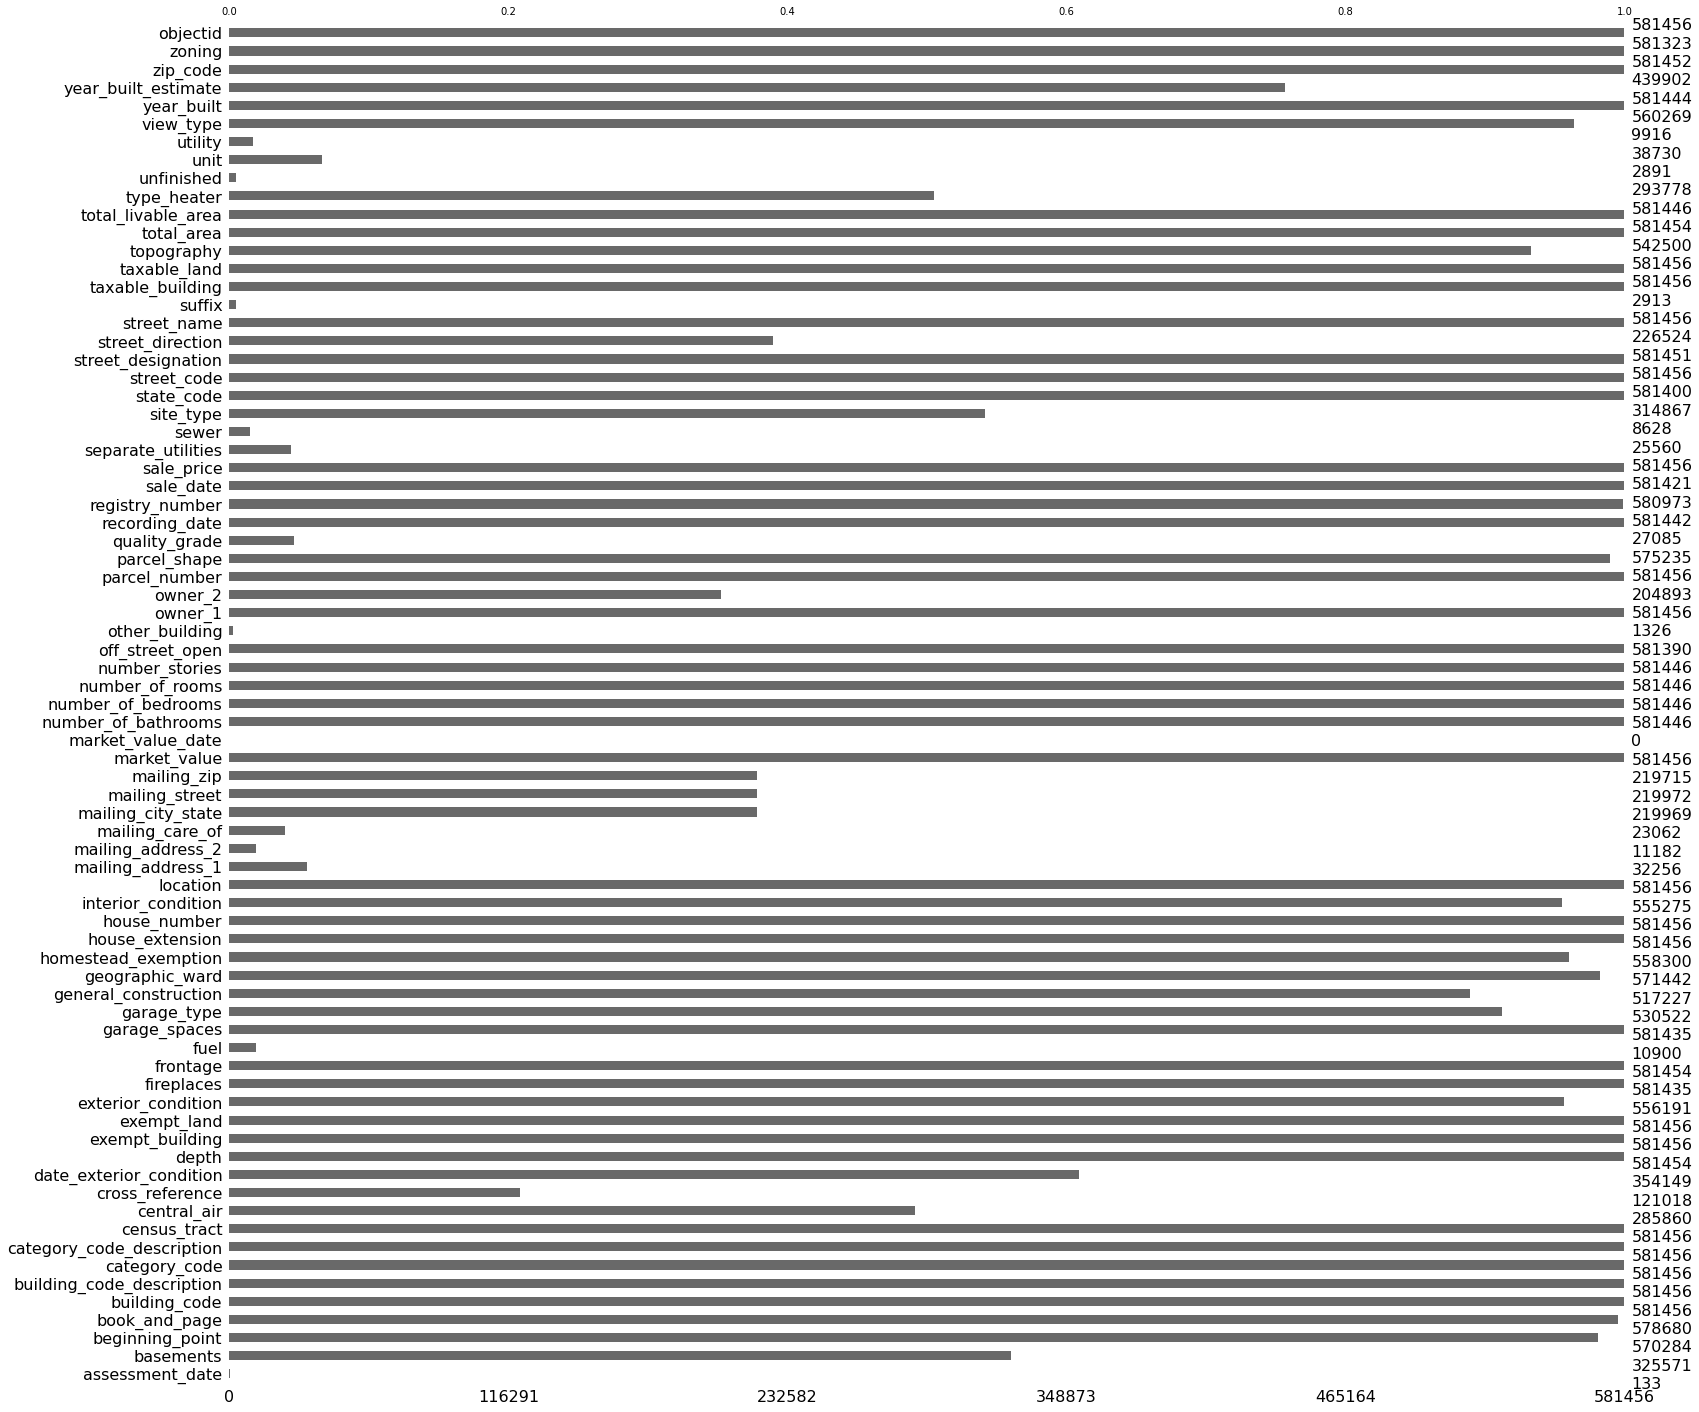

In [ ]:
# visualizing missing values in fields
msno.bar(df)
plt.show()

The longer bars indicate the presence of little or no missing values in the field while the shorter bars indicate the presence of much significant missing values in the field.

## Detailed Columns Info

In [ ]:
# checking null and unique values in dataset
df_details = pd.DataFrame({'columns': df.columns,
                           'total null': df.isna().sum().values,
                           'null percentage': (df.isna().sum()/df.shape[0]*100).round(2),
                           'unique values': [df[x].unique() for x in df.columns],
                           'unique total': [len(df[x].unique()) for x in df.columns]}).reset_index(drop=True)
df_details

,columns,total null,null percentage,unique values,unique total
0,assessment_date,581323,99.98,"[nan, 1949-01-01 00:00:00]",2
1,basements,255885,44.01,"[D, C, nan, 0, I, A, E, H, G, B, J, F]",12
2,beginning_point,11172,1.92,"[S W COR HOWARD , 15D94 W HOWARD ST ...",427363
3,book_and_page,2776,0.48,"[0.0, 3209422.0, 2448875.0, 3245897.0, 1390593...",494203
4,building_code,0,0.00,"[P50 , O50 , SR , R30 , O30 , R70 , P70...",802
5,building_code_description,0,0.00,"[ROW W/GAR 3 STY MASONRY, ROW 3 STY MASONRY, V...",798
6,category_code,0,0.00,"[1, 6, 2, 4, 3, 5]",6
7,category_code_description,0,0.00,"[Single Family, Vacant Land, Multi Family, Com...",6
8,census_tract,0,0.00,"[700.0, 710.0, 770.0, 772.0, 771.0, 711.0, 27....",584
9,central_air,295596,50.84,"[N, Y, nan, 0]",4


# **3. Data Preprocessing & Cleaning**

## Selecting Relevant Features  

The dataset consist of 75 fields and 581,456 observations. These fields provide information about the characteristics of properties in Philadelphia. However, based on the problem statement, goals and domain knowledge, there are several features that are not needed for further analysis in both the EDA and machine learning modeling stages. Also, there are fields with a high percentage of missing values. The considerations taken into account in the process of dropping irrelavant fields are explained in the following section.

  

There are some fields with percentage of missing values greater than 70%. These fields include:
  - `assement_date`
  - `cross_reference`
  - `fuel`
  - `mailing_address_1`
  - `mailing_address_2`
  - `mailing_care_of`
  - `market_value_date`
  - `other_building`
  - `quality_grade`
  - `separate_utilities`
  - `sewer`
  - `suffix`
  - `utility`
  
There are several fields with redundant location information that are not needed. These fields include:
  - `beginning_point`
  - `census_tract`
  - `geographic_ward`
  - `location`
  - `house_extension`
  - `house_number`
  - `mailing_city_state`
  - `mailing_street`
  - `mailing_zip`
  - `state_code`
  - `street_code`
  - `street_direction`
  - `street_name`

There are some fields containing a high number of unique values that are less useful for the current analysis. These fields include: 
  - `book_and_page`
  - `building_code`
  - `owner_1`
  - `owner_2`
  - `parcel_number`
  - `registry_number`
  - `unit`
  - `objectid` 

There are several fields whereby the description is not found in the metadata. These fields include:
  - `building_code_description`
  - `general_construction`
  - `homestead_exemption`
  - `off_street_open`
  - `parcel_shape`
  - `site_type`

There are some fields which are not directly needed in obtaining property market value. These fields include:
  - `exempt_building`
  - `exempt_land`	  

There are some fields which contain date data which are less useful in the current analysis. These fields include: 
  - `date_exterior_condition`
  - `recording_date` 
  - `year_built_estimate`

  



  






A total of 45 fields are dropped. 30 fields will be used for further analysis.

In [ ]:
# dropping columns that are not relevant
df = df.drop(['assessment_date', 'beginning_point', 'book_and_page','building_code','building_code_description',
              'census_tract', 'cross_reference', 'date_exterior_condition', 'exempt_land', 'exempt_building', 'fuel', 
              'geographic_ward', 'general_construction', 'homestead_exemption', 'house_extension', 'house_number', 'location',
              'mailing_address_1', 'mailing_address_2', 'mailing_care_of', 'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value_date', 
              'off_street_open', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape', 'quality_grade', 'registry_number', 
              'other_building', 'recording_date', 'separate_utilities', 'sewer', 'site_type', 'state_code', 'street_code', 
              'street_name', 'street_direction', 'suffix', 'year_built_estimate', 'unit', 'utility', 'objectid'],axis=1)

## Adding a New Feature

In order to extract insight from a datetime object, a new feature `sale_year` was created for further analysis.

In [ ]:
# create a new feature sale_year
df['sale_year'] = pd.DatetimeIndex(df['sale_date']).year

## Extracting Zip Code

The entries in the `zip_code` field are a 9-digits figure. However, the actual zip code in Philadelphia are 5-digits which corresponds with the first 5 digits in the entries. 

In [ ]:
# extracting first 5 digits in zip_code field to match reals zip codes in Philadelphia
df['zip_code'] = df['zip_code'].astype(str).str[:5]

In [ ]:
# checking unique values in zip_code
df['zip_code'].unique()

array(['19147', '19148', '19103', '19144', '19107', '19128', '19139',
       '19143', '19142', '19131', '19151', '19106', '19110', '19123',
       '19125', '19121', '19104', '19122', '19133', '19134', '19138',
       '19140', '19146', '19102', '19124', '19119', '19130', '19118',
       '19126', '19150', '19120', '19141', '19145', '19132', '19129',
       'nan', '19149', '19127', '19135', '19114', '19137', '19136',
       '19111', '19152', '19115', '19153', '19154', '19116', '19112',
       '19113', '19108', '19109'], dtype=object)

In [ ]:
# selecting dataframe without 'nan' in zip_code
df = df[df.zip_code != 'nan']

In [ ]:
# rechecking unique values in zip_code
df['zip_code'].unique()

array(['19147', '19148', '19103', '19144', '19107', '19128', '19139',
       '19143', '19142', '19131', '19151', '19106', '19110', '19123',
       '19125', '19121', '19104', '19122', '19133', '19134', '19138',
       '19140', '19146', '19102', '19124', '19119', '19130', '19118',
       '19126', '19150', '19120', '19141', '19145', '19132', '19129',
       '19149', '19127', '19135', '19114', '19137', '19136', '19111',
       '19152', '19115', '19153', '19154', '19116', '19112', '19113',
       '19108', '19109'], dtype=object)

## Filtering Rows

The dataset was further filtered to match the analysis context. Residential properties were selected.

In [ ]:
# dropping rows based on category 4 (commercial property) and 5 (industrial property)
df = df.drop(df[ (df['category_code'] ==4) | (df['category_code']==5) ].index)  

To ensure that only residential properties have been selected, further filtering was performed. Based on `zoning`, residential properties are zoned with codes that start with letter 'R'.

In [ ]:
# selecting rows based on zoning that start with letter 'R'
df = df.iloc[[i for i,j in enumerate(df['zoning'].astype('str')) if j[0]=='R'],:] 

In [ ]:
# checking unique values in zoning field
df['zoning'].unique()

array(['RSA5 ', 'RM1  ', 'RMX2 ', 'RM2  ', 'RSA3 ', 'RSA1 ', 'RSD1 ',
       'RMX3 ', 'RM4  ', 'RS3  ', 'RSA2 ', 'RTA1 ', 'RSD3 ', 'RMX1 ',
       'RM3  ', 'RSA  ', 'RSD2 ', 'RSA4 '], dtype=object)

In [ ]:
display(df.head(), df.tail())

,basements,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_date,sale_price,street_designation,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,view_type,year_built,zip_code,zoning,sale_year
0,D,1,Single Family,N,49.0,5.0,0.0,15.90,1.0,B,5.0,186800.0,2.0,4.0,7.0,0.0,1951-01-31 00:00:00,1.0,ST,19064.0,53836.0,F,779.0,1650.0,H,NaN,I,1920.0,19147,RSA5,1951.0
1,D,1,Single Family,Y,49.0,2.0,0.0,15.90,0.0,0,2.0,341600.0,1.0,3.0,0.0,0.0,2017-04-14 00:00:00,395000.0,ST,256576.0,85024.0,F,779.1,1203.0,H,NaN,I,1920.0,19147,RSA5,2017.0
2,D,1,Single Family,N,49.0,4.0,0.0,14.80,0.0,0,4.0,226200.0,1.0,4.0,0.0,2.0,1975-09-04 00:00:00,1.0,ST,121936.0,59264.0,F,725.2,1482.0,H,NaN,I,1920.0,19147,RSA5,1975.0
3,D,1,Single Family,Y,100.0,4.0,0.0,14.33,0.0,0,4.0,241500.0,2.0,4.0,8.0,2.0,2012-02-16 00:00:00,1.0,ST,142227.0,63273.0,F,1433.0,2049.0,A,NaN,I,1920.0,19147,RSA5,2012.0
4,C,1,Single Family,N,100.0,4.0,0.0,15.00,0.0,0,4.0,237000.0,2.0,4.0,0.0,3.0,2017-07-21 00:00:00,1.0,ST,129906.0,62094.0,F,1500.0,1155.0,H,NaN,I,1920.0,19147,RSA5,2017.0


,basements,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_date,sale_price,street_designation,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,view_type,year_built,zip_code,zoning,sale_year
581451,NaN,1,Single Family,Y,0.0,4.0,0.0,0.0,0.0,NaN,4.0,1982700.0,0.0,0.0,0.0,0.0,2009-05-15 00:00:00,1500000.0,ST,1784500.0,198200.0,F,0.0,2750.0,G,NaN,C,1910,19103,RMX3,2009.0
581452,NaN,1,Single Family,Y,0.0,4.0,0.0,0.0,0.0,NaN,4.0,1586200.0,0.0,0.0,0.0,0.0,1998-01-15 00:00:00,285000.0,ST,1382600.0,158600.0,F,0.0,2200.0,G,NaN,C,1910,19103,RMX3,1998.0
581453,NaN,1,Single Family,Y,0.0,4.0,0.0,0.0,0.0,NaN,4.0,2319000.0,0.0,0.0,0.0,0.0,1997-01-21 00:00:00,5279391.0,ST,2087100.0,231900.0,F,0.0,3950.0,G,NaN,C,1910,19103,RMX3,1997.0
581454,NaN,1,Single Family,Y,0.0,4.0,0.0,0.0,0.0,NaN,4.0,2090900.0,0.0,0.0,0.0,0.0,1977-08-11 00:00:00,188900.0,ST,1836900.0,209000.0,F,0.0,2860.0,G,NaN,C,1910,19103,RMX3,1977.0
581455,NaN,1,Single Family,Y,0.0,4.0,0.0,0.0,0.0,NaN,4.0,1532100.0,0.0,0.0,0.0,0.0,1987-07-29 00:00:00,425000.0,ST,1333900.0,153200.0,F,0.0,2120.0,G,NaN,C,1910,19103,RMX3,1987.0


## **`Zoning filtering`**


In Philadelphia, the government implements a zoning system whereby properties are zoned based on `frontage` and `total_area`. Based on the zoning code guide, we will filter the dataset. The rules that were implemented in the filtering process to match actual conditions are as follows:
<br> 


RSD (Residential Single-Family Detached)
* RSD 1:
  * Frontage > 35 feet
  * Lot Area > 10000 sq feet

* RSD 2:
  * Frontage > 35 feet
  * Lot Area > 7800 sq feet

* RSD 3:
  * Frontage > 25 feet
  * Lot Area > 5000 sq feet

RSA (Residential Single-Family Attached)
* RSA 1:
  * Frontage > 25 feet
  * Lot Area > 5000 sq feet

* RSA 2:
  * Frontage > 15 feet
  * Lot Area > 3150 sq feet

* RSA 3:
  * Frontage > 8 feet
  * Lot Area > 2250 sq feet

* RSA 4:
  * Frontage > 15 feet
  * Lot Area > 1620 sq feet

* RSA 6:
  * Frontage > based on adjacent
  * Lot Area > 700 sq feet


* RTA 1
  * Frontage > 8 ft
  * Lot Area > 2250 sq feet

RM (Residential Multi-Family)
* RM -1
  * Frontage > Based on Adjacent
  * Lot Area > 1440 sq feet

* RM -2
  * Frontage > based on height
  * Lot Area > 15000 sq feet

* RM -3
  * Frontage > 20ft
  * Lot Area > 10000 sq ft

* RM-4
  * Frontage > NA
  * Lot Area > 2500 sq feet

Source:https://www.phila.gov/documents/zoning-code-information-manual-quick-guide/


In [ ]:
# filtering frontage and total area based on zoning area
df=df.drop(df[(df['zoning']=='RSA3 ') & (df['frontage']<=8)  & (df['total_area']<=2250) ].index)
df=df.drop(df[(df['zoning']=='RSD3 ') & (df['frontage']<=25) & (df['total_area']<=5000)].index)
df=df.drop(df[(df['zoning']=='RSA4 ') & (df['frontage']<=15) & (df['total_area']<=1620)].index)
df=df.drop(df[(df['zoning']=='RSA2 ') & (df['frontage']<=15)& (df['total_area']<=3150)].index)
df=df.drop(df[(df['zoning']=='RSD1 ') & (df['frontage']<=35)& (df['total_area']<=10000)].index)
df=df.drop(df[(df['zoning']=='RSA1 ') & (df['frontage']<=25)& (df['total_area']<=5000)].index)
df=df.drop(df[(df['zoning']=='RSD2 ') & (df['frontage']<=35)& (df['total_area']<=7800)].index)
df=df.drop(df[(df['zoning']=='RTA1 ') & (df['frontage']<=8)& (df['total_area']<=2250)].index)
df=df.drop(df[(df['zoning']=='RM1 ') &  (df['total_area']<=1440)].index)
df=df.drop(df[(df['zoning']=='RM2 ') & (df['total_area']<=15000)].index )
df=df.drop(df[(df['zoning']=='RM3 ') & (df['frontage']<=20) & (df['total_area']<=10000)].index )
df=df.drop(df[df['zoning']=="RSA"].index)
df['zoning'].value_counts()

RSA5     286662
RM1      104749
RSA3      61609
RSD3      12298
RSA4      12139
RSA2      11900
RM2        5496
RTA1       4661
RM4        3706
RSD1       2934
RMX3       2226
RMX1       1272
RM3        1248
RSD2       1108
RSA1       1026
RMX2        267
RSA           3
RS3           1
Name: zoning, dtype: int64

In [ ]:
# data in RSA-4 with total_livable_area higher than 438,910 will be dropped, since the ceiling limit for the class is 810 sq ft. Thus, the data is invalid
df = df.drop(df[df['total_livable_area']==438910].index)

In [ ]:
# checking missing values in frontage field
df['frontage'].isna().sum()

0

In [ ]:
# checking unique values in frontage field
df['frontage'].unique()

array([  15.9 ,   14.8 ,   14.33, ...,   82.21, 1143.  , 1193.  ])

## Data Cleaning

At this stage, the fields which will used for EDA and machine learning modeling are cleaned to handle missing values and other anomalies.

### **1. `basements`**

This field contains 39.81% null values. The null values were filled by making inferences based on the relationship of basement field with other fields such as category_code and garage_type.    



In [ ]:
# checking unique values in basements field
df['basements'].unique()

array(['D', 'C', nan, '0', 'I', 'A', 'H', 'G', 'E', 'B', 'J', 'F'],
      dtype=object)

In [ ]:
# replacing '0' in basements field to 'O'
df['basements'] = np.where((df['basements'] == '0'), 'O', df['basements'])

# where category_code == 6 (vacant land), missing values assigned to basements 'O' (None)  
df['basements'] = np.where((df['basements'].isna()) & (df['category_code'] == 6), 'O', df['basements'])

# where garage_type == 'A' (basement/built-in), missing values assigned to basements 'H' (partial-unknown finish)
df['basements'] = np.where((df['basements'].isna()) & (df['garage_type'] == 'A'), 'H', df['basements'])

# assigning the remaining missing values to 'O' (None)
df['basements']=np.where(df['basements'].isna(), 'O', df['basements'])

In [ ]:
# rechecking missing values in basements field
df['basements'].isna().sum()

0

In [ ]:
# rechecking unique values in basements field
df['basements'].unique()

array(['D', 'C', 'O', 'I', 'A', 'H', 'G', 'E', 'B', 'J', 'F'],
      dtype=object)

### **2. `category_code`**

This field does not contain null values and other anomalies.

In [ ]:
# checking missing values in category_code field
df['category_code'].isna().sum()

0

In [ ]:
# checking unique values in category_code field
df['category_code'].unique()

array([1, 6, 2, 3])

### **3. `category_code_description`**

There are no null values in this field. However, some commercial and industrial properties were detected. These properties are dropped.

In [ ]:
# checking missing values in category_code_description field
df['category_code_description'].isna().sum()

0

In [ ]:
# checking unique values in category_code_description field
df['category_code_description'].unique()

array(['Single Family', 'Vacant Land', 'Multi Family', 'Mixed Use'],
      dtype=object)

In [ ]:
ccd_drop = df[(df['category_code_description']=='Commercial') | (df['category_code_description']=='Industrial')].index
df = df.drop(ccd_drop)

In [ ]:
# rechecking unique values in category_code_description field
df['category_code_description'].unique()

array(['Single Family', 'Vacant Land', 'Multi Family', 'Mixed Use'],
      dtype=object)

### **4. `central_air`**

This field contains 48.59% null values. The nan and '0' entries are classified as no central air ('N'). 

In [ ]:
# checking unique values in central_air field
df['central_air'].unique()

array(['N', 'Y', nan, '0'], dtype=object)

In [ ]:
# where central_air == nan or 'N', values assigned to central_air '0' (None)  
df['central_air'] = np.where((df['central_air'].isna()) | (df['central_air'] == 'N'), '0', df['central_air'])

# where central_air == 'Y', values assigned to central_air '1' (None)
df['central_air'] = np.where((df['central_air'] == 'Y'), '1', df['central_air'])

# casting central_air to a integer dtype
df['central_air'] = df['central_air'].astype('int64')

In [ ]:
# rechecking unique values in central_air field
df['central_air'].unique()

array([0, 1])

In [ ]:
# rechecking missing values in central_air field
df['central_air'].isna().sum()

0

  ### **5. `depth`** 

This field does not contain null values and other anomalies.

In [ ]:
# checking missing values in depth field
df['depth'].isna().sum()

0

In [ ]:
# checking unique values in depth field
df['depth'].unique()

array([4.90000e+01, 1.00000e+02, 7.50000e+01, ..., 3.75000e+04,
       3.68054e+05, 5.58848e+05])

### **6. `exterior_condition`**

This field contains 4.01% null values. The null values were filled by making inferences based on the relationship between exterior_condition and category_code.

In [ ]:
# checking unique values in exterior_condition field
df['exterior_condition'].unique()

array([ 5.,  2.,  4.,  0.,  3.,  1., nan,  6.,  7.])

In [ ]:
# where exterior_condition data is nan or category_code == 6 (vacant land) assign to exterior_condition 0 (not applicable) 
df['exterior_condition'] = np.where((df['exterior_condition'].isna()) | (df['category_code'] == 6), 0.0, df['exterior_condition'])

In [ ]:
# checking unique values in exterior_condition field
df['exterior_condition'].unique()

array([5., 2., 4., 0., 3., 1., 6., 7.])

In [ ]:
# rechecking missing values in exterior_condition field
df['exterior_condition'].isna().sum()

0

In [ ]:
# counting unique values in exterior_condition field
df['exterior_condition'].value_counts()

4.0    400066
0.0     36090
3.0     34251
5.0     13718
2.0     11996
1.0      9871
7.0      4866
6.0      2446
Name: exterior_condition, dtype: int64

### **7. `fireplaces`**

This field contains 5 missing values. In the dataset, entries for properties without fireplaces were left blank. Hence, the missing values will be replaced as zero.

In [ ]:
# checking missing values in fireplaces field
df['fireplaces'].isna().sum()

5

In [ ]:
# checking unique values in fireplaces field
df['fireplaces'].unique()

array([ 0.,  1.,  2.,  3., nan,  5.,  4., 10.])

In [ ]:
# counting unique values in fireplaces field
df['fireplaces'].value_counts()

0.0     499583
1.0      11175
2.0       1496
3.0        631
5.0        262
4.0        151
10.0         1
Name: fireplaces, dtype: int64

In [ ]:
# filling missing values in with 0.0 (no fireplace)
df['fireplaces'] = np.where(df['fireplaces'].isna(), 0.0, df['fireplaces'])

In [ ]:
# rechecking unique values in fireplaces field
df['fireplaces'].unique()

array([ 0.,  1.,  2.,  3.,  5.,  4., 10.])

In [ ]:
# rechecking missing values in fireplaces field
df['fireplaces'].isna().sum()

0

### **8. `frontage`**

This field does not contain null values and other anomalies.

In [ ]:
# rechecking missing values in frontage field
df['frontage'].isna().sum()

0

### **9. `garage_spaces`** 

This field contains 5 missing values. The missing values are filled with zero with an assumption that there are no garage_spaces in the property.

In [ ]:
# checking missing values in garage_spaces field
df['garage_spaces'].isna().sum()

5

In [ ]:
# checking unique values in garage_spaces field
df['garage_spaces'].unique()

array([ 1.,  0.,  2.,  5.,  3., nan,  4.,  6., 10., 20., 14.,  8., 12.,
        9., 18., 11., 13., 15.,  7., 16., 25., 24., 36., 23., 19., 28.,
       21., 48., 62., 38., 56., 77., 60., 22., 27., 50., 80., 32., 44.,
       26., 30.])

In [ ]:
# counting unique values in garage_spaces field
df['garage_spaces'].value_counts().head()

0.0    345567
1.0    153029
2.0     13637
3.0       559
4.0       236
Name: garage_spaces, dtype: int64

In [ ]:
# filling missing values in garage_spaces field with 0.0 (no garage space)
df['garage_spaces'] = np.where(df['garage_spaces'].isna(), 0.0, df['garage_spaces'])

In [ ]:
# rechecking unique values in garage_spaces field
df['garage_spaces'].unique()

array([ 1.,  0.,  2.,  5.,  3.,  4.,  6., 10., 20., 14.,  8., 12.,  9.,
       18., 11., 13., 15.,  7., 16., 25., 24., 36., 23., 19., 28., 21.,
       48., 62., 38., 56., 77., 60., 22., 27., 50., 80., 32., 44., 26.,
       30.])

In [ ]:
# rechecking missing values in garage_spaces field
df['garage_spaces'].isna().sum()

0

### **10. `garage_type`** 

This field contains 7.52% null values. The missing values are filled by categorizing the null values and '0' entries as 'O' (none). 



In [ ]:
# checking unique values in garage_type field
df['garage_type'].unique()

array(['B', '0', nan, 'A', 'C', 'F', 'T', 'S'], dtype=object)

In [ ]:
# replacing '0' in garage_type field to 'O'
df['garage_type'] = np.where((df['garage_type'] == '0'), 'O', df['garage_type'])

In [ ]:
# replacing nan in garage_type field to 'O' (none)
df['garage_type'] = np.where(df['garage_type'].isna(), 'O', df['garage_type'])

In [ ]:
# counting unique values in garage_spaces field
df['garage_type'].value_counts()

O    319959
A    142411
F     24170
C     18257
B      7415
S       915
T       177
Name: garage_type, dtype: int64

In [ ]:
# rechecking unique values in garage_type field
df['garage_type'].unique()

array(['B', 'O', 'A', 'C', 'F', 'T', 'S'], dtype=object)

In [ ]:
# rechecking missing values in garage_type field
df['garage_type'].isna().sum()

0

### **11. `interior_condition`**

This field contains 3,6% null values. The missing values for vacant land category is replaced by 0 (Not Applicable), other than that it will be dropped. Also there are 9,914 properties which have been indicated as '1' for the interior_condition. However, the metadata does not provide information about it. Thus, it will be dropped.

Indicate the overall condition of the interior:
- 0 = Not Applicable
- 2 = New / Rehabbed
- 3 = Above Average
- 4 = Average
- 5 = Below Average
- 6 = Vacant – No occupancy
- 7 = Sealed / Structurally Compromised -  Open to the Weather

In [ ]:
# checking unique values in interior_condition field
df['interior_condition'].unique()

array([ 5.,  2.,  4.,  0.,  3.,  1., nan,  6.,  7.])

In [ ]:
# where exterior_condition data is nan or category_code == 6 (vacant land) assign to exterior_condition 0 (not applicable)
df['interior_condition'] = np.where((df['category_code'] == 6), 0.0, df['interior_condition'])

In [ ]:
# checking missing value in interior_condition field
df['interior_condition'].isna().sum()

109

In [ ]:
# removing the null Values
df = df.drop(df[df['interior_condition'].isna()].index)

In [ ]:
# rechecking missing value in interior_condition field
df['interior_condition'].isna().sum()

0

In [ ]:
# counting unique values in interior_condition field
df['interior_condition'].value_counts()

4.0    399330
0.0     36159
3.0     34301
5.0     13662
2.0     12638
1.0      9753
7.0      4865
6.0      2487
Name: interior_condition, dtype: int64

In [ ]:
# removing properties with a '1' as their interior condition indicator
df = df.drop(df[df['interior_condition'] == 1].index)

In [ ]:
# counting unique values in interior_condition field
df['interior_condition'].value_counts()

4.0    399330
0.0     36159
3.0     34301
5.0     13662
2.0     12638
7.0      4865
6.0      2487
Name: interior_condition, dtype: int64

### **12. `market_value`**

This field does not contain null value, the data distribution is skewed. However, there will be no further treatment to treat outlier because the outlier is not an anomaly. 

There is one property that has a '0' valuation for its market value, so it will be dropped.


In [ ]:
# checking missing value in market_value field
df['market_value'].isna().sum()

0

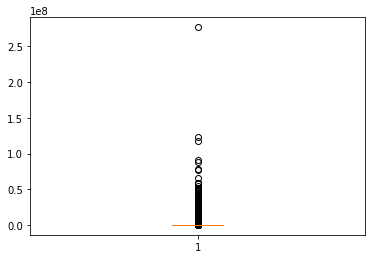

In [ ]:
# checking outlier in market_value
plt.boxplot(df['market_value'])
plt.show()

The graph shows the presence of outliers in the market_value as the range of the data is wide. These outliers will not be cleaned because there is no tight restriction in the valuation of properties. For modeling purpose, the market_value will serve as the target variable.

In [ ]:
# checking the descriptive statistics of market_value field
df['market_value'].describe()

count    5.034420e+05
mean     1.700977e+05
std      7.042551e+05
min      0.000000e+00
25%      6.560000e+04
50%      1.221000e+05
75%      2.018000e+05
max      2.768920e+08
Name: market_value, dtype: float64

In [ ]:
# checking properties with 0 as their market_value
len([df['market_value'] == 0])

1

In [ ]:
# removing row with a '0' in the market_value
df = df.drop(df[df['market_value'] == 0].index)

### **13. `number_of_bathrooms`** 

There are 3 rows that contains null value, it will be dropped. The data distribution is skewed.


In [ ]:
# counting unique values in number_of_bathrooms field
df['number_of_bathrooms'].value_counts()

1.0     314895
0.0     149489
2.0      31582
3.0       5753
4.0       1231
5.0        218
6.0        118
7.0         24
8.0         23
10.0         8
9.0          8
12.0         4
11.0         3
14.0         1
21.0         1
18.0         1
20.0         1
53.0         1
69.0         1
Name: number_of_bathrooms, dtype: int64

In [ ]:
# checking missing value in number_of_bathrooms field
df['number_of_bathrooms'].isna().sum()

1

In [ ]:
# removing the null value
df = df.drop(df[df['number_of_bathrooms'].isna()].index)

In [ ]:
# re-checking missing value in number_of_bathrooms field
df['number_of_bathrooms'].isna().sum()

0

<ipython-input-80-33654565b00a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_bathrooms'], kde = False)


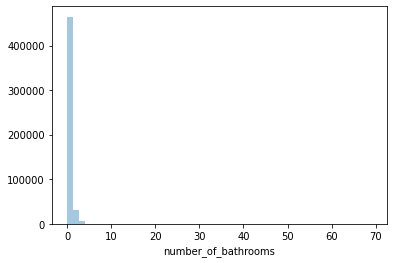

In [ ]:
# checking the distribution of number_of_bathrooms field
sns.distplot(df['number_of_bathrooms'], kde = False)
plt.show()

The graph shows that the data is skewed, the range of the data is wide. 

In [ ]:
# checking the descriptive statistics of number_of_bathrooms field
df['number_of_bathrooms'].describe()

count    503362.000000
mean          0.800259
std           0.652029
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          69.000000
Name: number_of_bathrooms, dtype: float64

Check Abnormality

### **14. `number_of_bedrooms`** 

The field does not contain null values. However, the data distribution is skewed.


In [ ]:
# counting unique values in number_of_bedrooms field
df['number_of_bedrooms'].value_counts()

3.0     272703
0.0     151719
4.0      44729
2.0      25617
5.0       4608
6.0       2320
1.0        714
7.0        459
8.0        284
9.0         97
10.0        25
11.0        16
31.0        12
12.0        12
13.0         7
14.0         7
16.0         5
30.0         4
44.0         4
79.0         2
45.0         2
15.0         2
22.0         2
23.0         2
20.0         2
50.0         1
84.0         1
74.0         1
77.0         1
34.0         1
28.0         1
40.0         1
17.0         1
Name: number_of_bedrooms, dtype: int64

In [ ]:
# checking missing value in number_of_bedrooms field
df['number_of_bedrooms'].isna().sum()

0

In [ ]:
df.shape

(503362, 31)

<ipython-input-85-c392c2a90912>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_bedrooms'], kde = False)


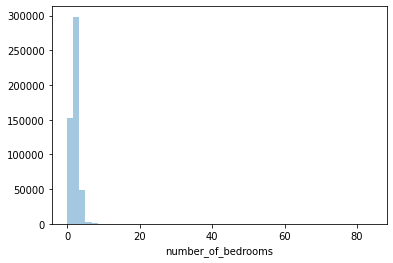

In [ ]:
# checking the distribution of number_of_bedrooms field
sns.distplot(df['number_of_bedrooms'], kde = False)
plt.show()

The graph shows that the data is skewed, the range of the data is wide. 

In [ ]:
# checking the descriptive statistics of number_of_bedrooms field
df['number_of_bedrooms'].describe()

count    503362.000000
mean          2.174598
std           1.555264
min           0.000000
25%           0.000000
50%           3.000000
75%           3.000000
max          84.000000
Name: number_of_bedrooms, dtype: float64

### **15. `number_of_rooms`** 

The field does not contain null value. The data is skewed. Furthermore, some of the data represented in this field, is not as described as in the metadata description. 

Description: 'The total number of rooms in the property.' <br/>Including bedroom(s) and bathroom(s).

Meanwhile, some properties have a '0' number of rooms, but they have bedroom(s) and bathroom(s).


In [ ]:
# counting unique values in number_of_bedrooms field
df['number_of_rooms'].value_counts()

6.0     261644
0.0     164100
7.0      41022
4.0      10984
5.0      10531
8.0       7646
9.0       2218
10.0      1887
3.0       1126
12.0       711
11.0       541
2.0        451
13.0       134
14.0       114
15.0        74
16.0        56
18.0        28
20.0        19
17.0        18
1.0         13
19.0        11
22.0         5
21.0         4
36.0         3
32.0         2
25.0         2
24.0         2
23.0         2
30.0         2
28.0         2
76.0         1
40.0         1
65.0         1
87.0         1
79.0         1
46.0         1
27.0         1
26.0         1
67.0         1
44.0         1
Name: number_of_rooms, dtype: int64

In [ ]:
# checking the missing value in number_stories field
df['number_of_rooms'].isna().sum()

0

<ipython-input-89-9ddebbae20b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_rooms'], kde = False)


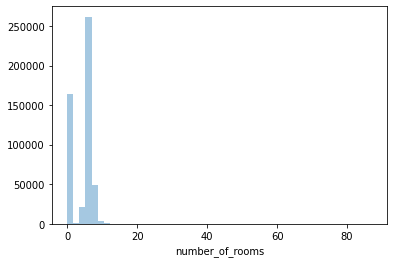

In [ ]:
# checking the distribution of number_of_rooms field
sns.distplot(df['number_of_rooms'], kde = False)
plt.show()

The graph shows that the data distribution is skewed and the range of the data is wide.

In [ ]:
# checking the descriptive statistics of number_of_rooms field
df['number_of_rooms'].describe()

count    503362.000000
mean          4.132833
std           2.977426
min           0.000000
25%           0.000000
50%           6.000000
75%           6.000000
max          87.000000
Name: number_of_rooms, dtype: float64

In [ ]:
df[df['number_of_rooms'] == 0].head()

,basements,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_date,sale_price,street_designation,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,view_type,year_built,zip_code,zoning,sale_year
1,D,1,Single Family,1,49.0,2.0,0.0,15.9,0.0,O,2.0,341600.0,1.0,3.0,0.0,0.0,2017-04-14 00:00:00,395000.0,ST,256576.0,85024.0,F,779.1,1203.0,H,NaN,I,1920.0,19147,RSA5,2017.0
2,D,1,Single Family,0,49.0,4.0,0.0,14.8,0.0,O,4.0,226200.0,1.0,4.0,0.0,2.0,1975-09-04 00:00:00,1.0,ST,121936.0,59264.0,F,725.2,1482.0,H,NaN,I,1920.0,19147,RSA5,1975.0
4,C,1,Single Family,0,100.0,4.0,0.0,15.0,0.0,O,4.0,237000.0,2.0,4.0,0.0,3.0,2017-07-21 00:00:00,1.0,ST,129906.0,62094.0,F,1500.0,1155.0,H,NaN,I,1920.0,19147,RSA5,2017.0
5,D,1,Single Family,0,100.0,4.0,0.0,15.0,0.0,O,4.0,282300.0,1.0,4.0,0.0,3.0,2006-02-27 00:00:00,212000.0,ST,208337.0,73963.0,F,1500.0,1785.0,H,NaN,I,1920.0,19147,RSA5,2006.0
6,O,6,Vacant Land,0,75.0,0.0,0.0,16.0,0.0,O,0.0,63900.0,0.0,0.0,0.0,0.0,1973-03-08 00:00:00,1.0,ST,0.0,0.0,F,1200.0,0.0,NaN,NaN,NaN,0.0,19147,RSA5,1973.0


In [ ]:
df[df['number_of_rooms'] < (df['number_of_bathrooms'] + df['number_of_bedrooms'])].head()

,basements,category_code,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_date,sale_price,street_designation,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,view_type,year_built,zip_code,zoning,sale_year
1,D,1,Single Family,1,49.0,2.0,0.0,15.9,0.0,O,2.0,341600.0,1.0,3.0,0.0,0.0,2017-04-14 00:00:00,395000.0,ST,256576.0,85024.0,F,779.1,1203.0,H,NaN,I,1920.0,19147,RSA5,2017.0
2,D,1,Single Family,0,49.0,4.0,0.0,14.8,0.0,O,4.0,226200.0,1.0,4.0,0.0,2.0,1975-09-04 00:00:00,1.0,ST,121936.0,59264.0,F,725.2,1482.0,H,NaN,I,1920.0,19147,RSA5,1975.0
4,C,1,Single Family,0,100.0,4.0,0.0,15.0,0.0,O,4.0,237000.0,2.0,4.0,0.0,3.0,2017-07-21 00:00:00,1.0,ST,129906.0,62094.0,F,1500.0,1155.0,H,NaN,I,1920.0,19147,RSA5,2017.0
5,D,1,Single Family,0,100.0,4.0,0.0,15.0,0.0,O,4.0,282300.0,1.0,4.0,0.0,3.0,2006-02-27 00:00:00,212000.0,ST,208337.0,73963.0,F,1500.0,1785.0,H,NaN,I,1920.0,19147,RSA5,2006.0
14,D,1,Single Family,0,60.0,4.0,0.0,16.0,0.0,O,4.0,248100.0,1.0,4.0,0.0,3.0,1994-07-28 00:00:00,51000.0,ST,43598.0,65002.0,F,960.0,1465.0,H,NaN,I,1920.0,19147,RSA5,1994.0


There are some inconsistencies in `number_of_rooms` field. The number of rooms are supposed to be equal or greater than the addition `number_of_bedrooms` and `number_of_bathrooms` (`number_of_rooms` >= (`number_of_bathrooms` + `number_of_bedrooms`). This feature will be dropped because of its high proportion of inconsistencies.

### **16. `number_stories`** 

This field does not contain null value. The data distribution in this field is skewed.


In [ ]:
# counting unique values in number_stories field
df['number_stories'].value_counts()

2.0     319593
0.0     129451
3.0      46357
1.0       5106
4.0       2438
5.0         99
6.0         61
8.0         32
9.0         30
12.0        28
7.0         27
11.0        25
15.0        25
14.0        23
16.0        23
10.0        21
18.0         6
13.0         5
20.0         3
17.0         3
19.0         2
21.0         1
22.0         1
31.0         1
32.0         1
Name: number_stories, dtype: int64

In [ ]:
# checking missing value in number_stories field
df['number_stories'].isna().sum()

0

<ipython-input-95-3ae176c6ddbd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_stories'], kde = False)


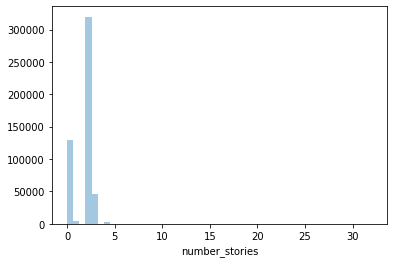

In [ ]:
# checking the distribution of number_stories field
sns.distplot(df['number_stories'], kde = False)
plt.show()

In [ ]:
# checking the descriptive statistics of number_stories field
df['number_stories'].describe()

count    503362.000000
mean          1.583363
std           1.018237
min           0.000000
25%           0.000000
50%           2.000000
75%           2.000000
max          32.000000
Name: number_stories, dtype: float64

### **17. `sale_date` / `sale_year`** 
This field contains 27 null values. Rows that contain null values will be dropped.


In [ ]:
# counting unique values in sale_year field
df['sale_year'].value_counts()

2019.0    28745
2018.0    28095
2017.0    26623
2016.0    24727
2015.0    21892
          ...  
1921.0       15
1932.0       15
1936.0       14
1933.0        9
1917.0        2
Name: sale_year, Length: 104, dtype: int64

In [ ]:
# counting unique values in sale_year field
len(df['sale_year'].unique())

105

In [ ]:
# checking missing value in sale_year field
df['sale_year'].isna().sum()

26

In [ ]:
# removing the Null Value
df=df.drop(df[df['sale_year'].isna()].index)

In [ ]:
# checking missing value in sale_year field after removing the Null Value
df['sale_year'].isna().sum()

0

<ipython-input-102-cc3f0b1f2b2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sale_year'], kde = False)


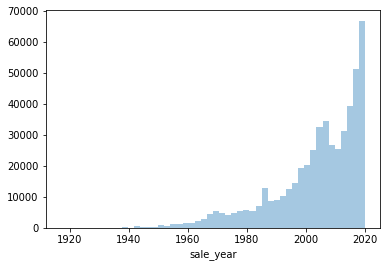

In [ ]:
# checking the distribution of sale_year field
sns.distplot(df['sale_year'], kde = False)
plt.show()

### **18. `sale_price`** 
There is no null value in this field. The feature will not be used for the machine learning modeling.

In [ ]:
# checking missing value in sale_price field
df['sale_price'].isna().sum()

0

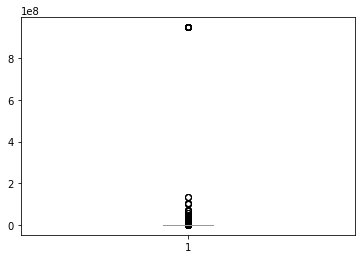

In [ ]:
# checking outlier in sale_price
plt.boxplot(df['sale_price'])
plt.show()

In [ ]:
# checking the descriptive statistics of market_value field
df['sale_price'].describe()

count    5.033360e+05
mean     2.508626e+05
std      1.167385e+07
min      0.000000e+00
25%      1.000000e+00
50%      3.800000e+04
75%      1.200000e+05
max      9.487291e+08
Name: sale_price, dtype: float64

### **19. `street_designation`** 
This field does not contain null value. The data distribution is skewed.

In [ ]:
# counting unique values in street_designation field
df['street_designation'].value_counts()

ST     374231
AVE     72540
RD      28560
LA       7944
PL       5518
DR       5358
SQ       1961
BLV      1852
TER      1556
WAY       855
CT        849
CIR       772
PK        559
PKY       356
PLZ       168
MEW        86
ALY        61
WLK        57
HTS        24
PTH        15
ROW         9
LN          5
Name: street_designation, dtype: int64

In [ ]:
# counting unique values in street_designation field
len(df['street_designation'].unique())

22

In [ ]:
# checking missing value in street_designation field
df['street_designation'].isna().sum()

0

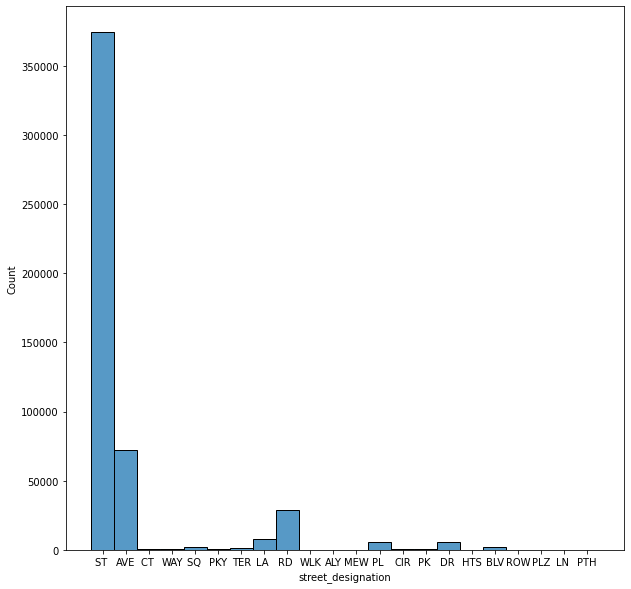

In [ ]:
# checking the distribution of street_designation field
plt.figure(figsize=(10,10))
sns.histplot(df['street_designation'], kde = False)
plt.show()

### **20. `taxable_building`**  
The is no null value in this field. The data is skewed, and the gap between max value and the "normal value" is wide. This field will only be used for EDA.

In [ ]:
# checking missing value in taxable_building field
df['taxable_building'].isna().sum()

0

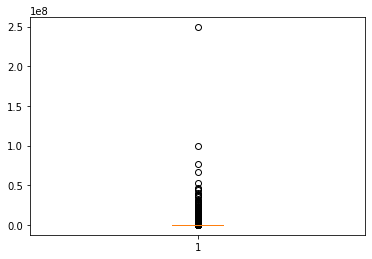

In [ ]:
# checking outlier in taxable_building
plt.boxplot(df['taxable_building'])
plt.show()

### **21. `taxable_land`**  
The is no null value in this field. The data is skewed, and the gap between max value and the "normal value" is wide. This field will only be used for EDA.

In [ ]:
# checking missing value in taxable_land field
df['taxable_land'].isna().sum()

0

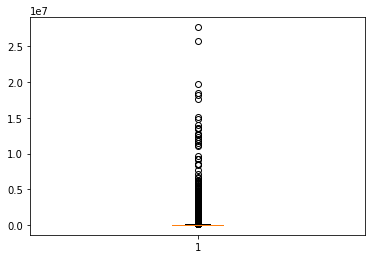

In [ ]:
# checking outlier in taxable_land
plt.boxplot(df['taxable_land'])
plt.show()

### **22. `topography`**
This field contain 6,76% it will be replaced by 0 values which represents topography not specified.

In [ ]:
# checking unique values in topography
df['topography'].unique()

array(['F', nan, 'E', 'A', 'D', 'C', 'B', '0'], dtype=object)

In [ ]:
df['topography']=np.where(df['topography'].isna(),'0',df['topography'])

In [ ]:
# replace type heater nan to 0 
df['type_heater']=np.where(df['type_heater'].isna(),'0',df['type_heater'])

### **23. `total_area`**  
In the total_area field there are several rows that have "0" as their value. Which in our case, can be considered as an invalid data since area in a property can not be zero. Thus, it will be dropped.

In [ ]:
# drop rows with zero in total_area
df = df.drop(df[df['total_area']==0].index)

In [ ]:
# checking remaining rows
df.shape[0]

486409

### **24. `total_livable_area`**  
There is no null value in this field.

In [ ]:
# checking missing value in total_livable_area field
df['total_livable_area'].isna().sum()

0

### **25. `type_heater`**
This field contains 49.48% missing values, these missing value can be considered as the property does not have any heating system. Thus, it can be replaced with 0.

In [ ]:
# unique values in unfinfished
df['type_heater'].unique()

array(['H', 'A', '0', 'B', 'G', 'E', 'C', 'D'], dtype=object)

In [ ]:
# checking type_heater distribution
df['type_heater'].value_counts() 

0    226596
H    118586
A     77214
B     58055
G      4379
C       827
E       578
D       174
Name: type_heater, dtype: int64


###  **26. `unfinished`** 
This field contains 99.50 % nan values which indicate the majority of the property/building are already finish.


In [ ]:
# unique values in unfinfished
df['unfinished'].unique()

array([nan, 'U'], dtype=object)

In [ ]:
# replace nan values to 0 and 1 for unfinished
df['unfinished']=np.where(df['unfinished'].isna(),0,np.where(df['unfinished']=='U',1,0))

### **27. `view_type`**
This field contains 3.64% missing values and will be replaced with 0 which indicates absence of view option on property.

In [ ]:
# unique values in view type
df['view_type'].unique()

array(['I', nan, 'C', 'A', 'E', 'H', 'B', 'D', '0'], dtype=object)

In [ ]:
df['view_type']=np.where(df['view_type'].isna(),'0',df['view_type'])

### **28. `year_built`**
This field doesn't contain any missing value but there are several 0 entries which is not possible in real life. So, it will be dropped for the treatment as the data is invalid.

In [ ]:
# drop 0 values
df = df.drop(df[df['year_built']==0].index)

In [ ]:
df = df.drop(df[df['year_built']=='196Y'].index)

### **29. `zip_code`**
After extracting the first five digits of zip_code, the null values of this filed is checked. 
This field does not contain any null value.

In [ ]:
# selecting dataframe without 'nan' in zip_code
df = df[df.zip_code != 'nan']

In [ ]:
# rechecking unique values in zip_code
df['zip_code'].unique()

array(['19147', '19148', '19107', '19139', '19143', '19142', '19131',
       '19151', '19106', '19103', '19123', '19128', '19104', '19125',
       '19122', '19133', '19134', '19140', '19146', '19102', '19119',
       '19130', '19118', '19126', '19138', '19144', '19150', '19120',
       '19141', '19145', '19132', '19121', '19149', '19127', '19135',
       '19114', '19129', '19124', '19137', '19111', '19152', '19115',
       '19153', '19136', '19154', '19116', '19112'], dtype=object)

In [ ]:
# counting unique values in zip_code
df['zip_code'].value_counts()

19143    22086
19134    20646
19120    20124
19124    20084
19148    18743
19111    17964
19149    17754
19140    17631
19145    16171
19132    15288
19146    13407
19139    13111
19131    12235
19138    11683
19128    11496
19147    11260
19144    11069
19135    10888
19154    10742
19151    10364
19136    10253
19121     9668
19152     9592
19142     9572
19141     9023
19150     8944
19119     8716
19116     8522
19125     8489
19104     8232
19114     8108
19115     7975
19133     7800
19130     5476
19126     4667
19122     4275
19153     3650
19129     3246
19137     3086
19118     2392
19123     2172
19127     2107
19103     1695
19106      820
19107      701
19102      130
19112        1
Name: zip_code, dtype: int64

### **30. `zoning`**
After the initial filtering by zoning, this field does not have any null value.

In [ ]:
# counting unique values in zoning
df['zoning'].value_counts()

RSA5     259138
RM1       87347
RSA3      59434
RSA4      12120
RSD3      11942
RSA2      11538
RTA1       4503
RSD1       2665
RSA1        968
RSD2        909
RM2         807
RM4         387
RM3         107
RMX3         99
RMX1         91
RMX2          2
RS3           1
Name: zoning, dtype: int64

## Detailed Columns Info

In [ ]:
df_details = pd.DataFrame({'columns': df.columns,
                           'total null': df.isna().sum().values,
                           'null percentage': (df.isna().sum()/df.shape[0]*100).round(2),
                           'unique values': [df[x].unique() for x in df.columns],
                           'unique total': [len(df[x].unique()) for x in df.columns]}).reset_index(drop=True)
df_details

,columns,total null,null percentage,unique values,unique total
0,basements,0,0.0,"[D, C, O, I, H, A, G, E, B, J, F]",11
1,category_code,0,0.0,"[1, 2, 3, 6]",4
2,category_code_description,0,0.0,"[Single Family, Multi Family, Mixed Use, Vacan...",4
3,central_air,0,0.0,"[0, 1]",2
4,depth,0,0.0,"[49.0, 100.0, 90.0, 32.0, 60.0, 48.0, 36.0, 44...",16150
5,exterior_condition,0,0.0,"[5.0, 2.0, 4.0, 3.0, 6.0, 7.0, 0.0, 1.0]",8
6,fireplaces,0,0.0,"[0.0, 1.0, 2.0, 3.0, 5.0, 4.0]",6
7,frontage,0,0.0,"[15.9, 14.8, 14.33, 15.0, 29.17, 18.03, 18.05,...",8795
8,garage_spaces,0,0.0,"[1.0, 0.0, 2.0, 5.0, 3.0, 4.0, 6.0, 10.0, 20.0...",38
9,garage_type,0,0.0,"[B, O, A, C, F, T, S]",7


The table above shows that the data cleaning process is done as there are no  null values in each column. It also shows the number of unique values and the value  in each columns.

# **4. Exploratory Data Analysis (EDA)**

## Data Distribution of Numerical Variables

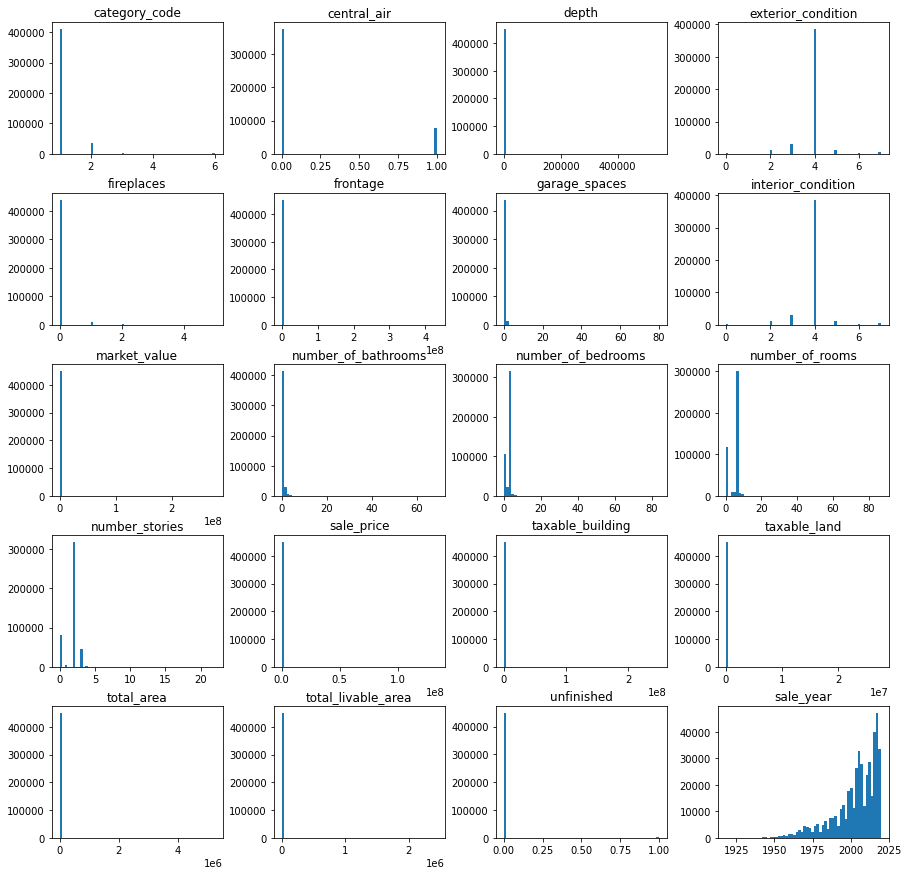

In [ ]:
# histogram of numerical fields in dataset
df.hist(bins=60,figsize=(15,15), grid=False)
plt.show()

Based on the data distribution graphs above, it can be observed that most of the features are not normally distributed. Also, outliers are observed in fields such as number of bedrooms, number of rooms, number of stories and market value. In the case of linear regression, a data distribution that is not normal can affect the accuracy of the model. Before data modeling, features that are not normally distributed will be scaled.

## Correlation Between the Features and Target Variable (`market_value`)

Text(0.5, 1.0, 'Correlation matrix of features & target variable')

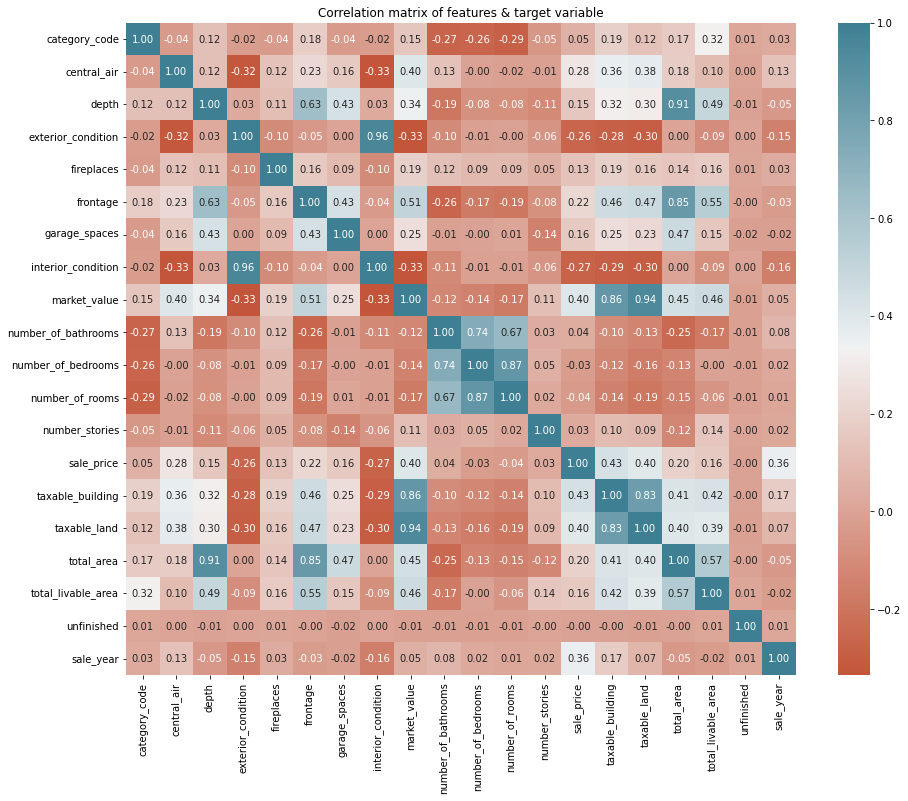

In [ ]:
# creating a correlation_matrix
correlation_matrix = df.corr(method='spearman')

# plotting the heatmap
palette = sns.diverging_palette(20, 220, n=256)
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=palette)
plt.title('Correlation matrix of features & target variable')


From the correlation matrix above, it can be observed that the features which are better correlated with the property `market_value` include  `total_livable_area` (0.46), `total_area` (0.45), `frontage` (0.51) and `central_air` (0.41).  

## Property Size vs Market Value

Text(0.5, 1.0, 'Total area vs Market value')

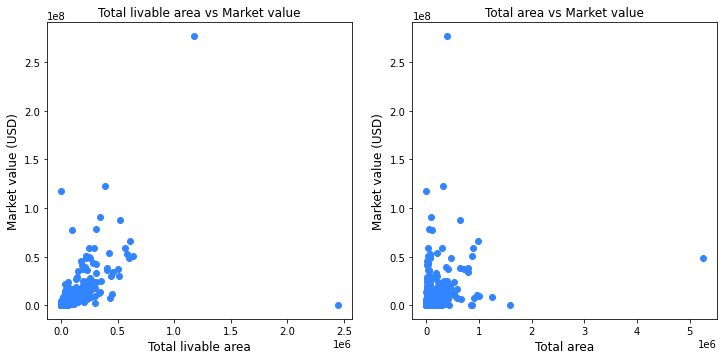

In [ ]:
plt.figure(figsize=(12,12))

# scatterplot of total_livable_area vs market_value
plt.subplot(2,2,1)
plt.scatter(x=df['total_livable_area'], y=df['market_value'], color='#3385ff')
plt.xlabel('Total livable area', fontsize=12)
plt.ylabel('Market value (USD)', fontsize=12)
plt.title('Total livable area vs Market value')

# scatterplot of total_area vs market_value
plt.subplot(2,2,2)
plt.scatter(x=df['total_area'], y=df['market_value'], color='#3385ff')
plt.xlabel('Total area', fontsize=12)
plt.ylabel('Market value (USD)', fontsize=12)
plt.title('Total area vs Market value')



From the charts above, the relationship between the variables cannot be properly visualized due to the observable outliers. To enhance the visualization, rows from the dataset are selected based on total_livable_area less than 1,000,000, market_value less than 130,000,000, and total_area less than 1,000,000. 

[Text(0.5, 1.0, 'Total area vs Market value')]

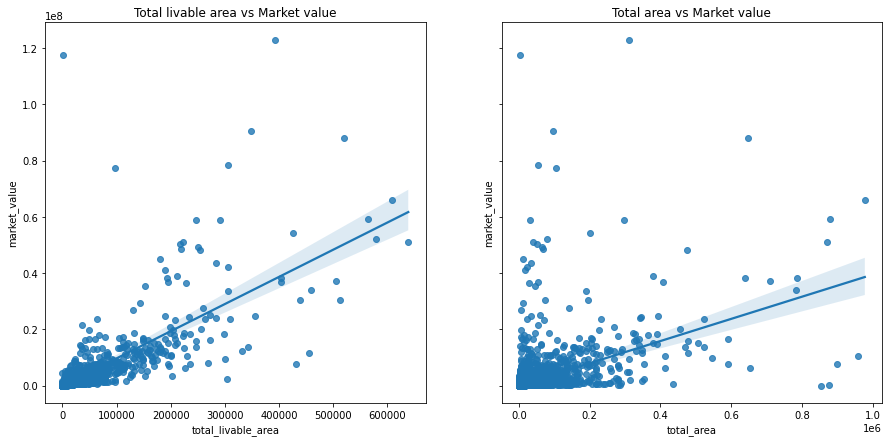

In [ ]:
df_outliersless = df[(df['total_livable_area'] < 1000000) & (df['market_value'] < 130000000) & (df['total_area'] < 1000000)]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 7))

# scatterplot of total_livable_area vs market_value with trend line
sns.regplot(data=df_outliersless, x='total_livable_area', y='market_value', ax=ax1).set(title='Total livable area vs Market value')

# scatterplot of total_area vs market_value with trend line
sns.regplot(data=df_outliersless, x='total_area', y='market_value', ax=ax2).set(title='Total area vs Market value')



Generally, it can be seen that there is a positive relationship between between properties total livable area and market value. The same relationship also applies between total area and market value

## Median `market_value` and `sale_price` per year

Text(0, 0.5, 'Price (USD)')

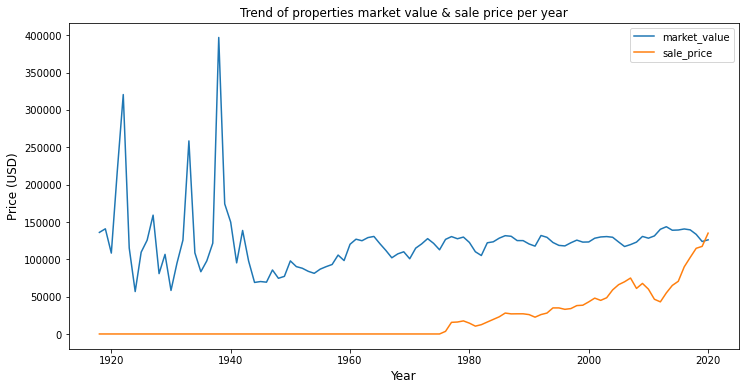

In [ ]:
# lineplot of median market_value and sale_price per year 
df_price = df[['market_value','sale_price', 'sale_year']]
df_price.groupby(by='sale_year').median().plot(figsize=(12,6))
plt.title('Trend of properties market value & sale price per year')
plt.xlabel('Year', size=12)
plt.ylabel('Price (USD)', size=12)

From the trend of median property `market_value` and `sale_price`, we see that the sale price of houses decreased significantly as a result of the financial crisis in 2008. After the economy started to recover around 2012, the sale price of houses experienced a consistent rise until 2020 where the sale price of houses exceeded their market value. This phenomenon confirms the reality of house overpricing that is still happening in the city of Philadelphia. This condition will further make it more competitive for buyers to secure affordable hosuing in Philadelphia. <br>

Some inconsistencies were observed in the median sale_price below 1975. The data entry until 1975 was observed to contain zero(s) and one(s). However, this is not a concern for our data modeling because sale price is not considered as a factor which affects property market value. The sale_price feature will be dropped before the data modeling process.

## Mapping Median Market Value Based on Zip Code

In [ ]:
import json
with open ('/content/drive/MyDrive/Final Project/Zipcodes_Poly.geojson', 'r') as jsonFile:
    philymapdata = json.load(jsonFile)
map_zip=philymapdata
temp=df.groupby('zip_code').median()[['taxable_land','taxable_building','market_value']].reset_index()
import plotly.express as px

fig = px.choropleth_mapbox(temp, geojson=map_zip, locations='zip_code', color='market_value',
                           color_continuous_scale="Viridis",featureidkey="properties.CODE",
                           zoom=10, center = {"lat": 40.0467250633476, "lon": -75.1040789454085},
                           labels={'taxabale_land':'median tax'},
                          mapbox_style="carto-positron"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(geo_bgcolor="#323130")
fig.show()

The above map shows that the price of a property is location-sensitive, meaning that properties which are located in city centre are more expensive than properties location farther from city center. City centre zip codes include 19106, 19107, 19102, 19103, 19147, 19146, 19123, and 19130. 

In [ ]:
fig=px.bar(pd.pivot_table(index='zip_code',columns='category_code_description',data=df,aggfunc='count')['market_value']['Vacant Land'], color_discrete_map={
        'Vacant Land': '#3385ff'
    },title='Vacant Land Availability Based On ZipCode',labels={
                     "value": "Number of Vacant Land"})
fig.update_layout(xaxis={'categoryorder':'total ascending'})


The chart shows the number of available properties based on zip code. The number of vacant land decreases as we get closer to the city center. In the area with zip code 19130, there is only one available vacant land.

## Distribution of Property and Median Market Value Based on Zoning

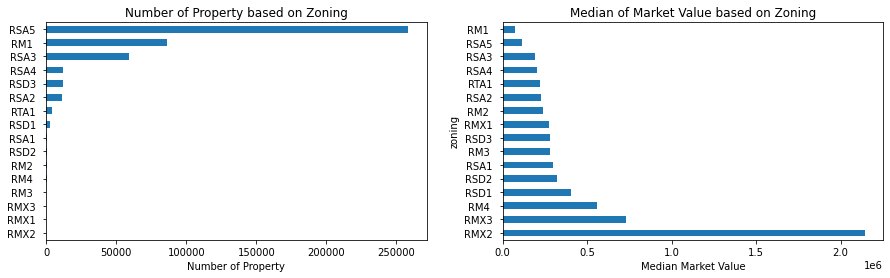

In [ ]:
# number of property and market value based on zoning
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df['zoning'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Property')
plt.title('Number of Property based on Zoning');
plt.subplot(1,2,2)
df.groupby(by='zoning').median()['market_value'].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Median Market Value')
plt.title('Median of Market Value based on Zoning');

The left figure shows the distribution of the property based on its zoning category, presented in ascending order from the highest number to the lowest number of properties.

The second figure shows the median market value of a property based on its zoning category, presented in descending order from the most affordable property to the most expensive ones.

From the figure above, we can conclude that the most available and affordable type of housing are located in RSA5, RM1 and RSA3 districts.

In [ ]:
# df.to_csv('tableau_EDA.csv')

# **5. Data Preparation & Feature Engineering**

## Data Preparation

In this process, we reduced the level of cardinality in the dataset to improve the performance of machine learning models.

### **`basements`**

The values in the `basement` feature are denoted as:
* O: None
* A: Full Finished
* B: Full Semi-Finished
* C: Full Unfinished
* D: Full – Unknown Finish
* E: Partial Finished
* F: Partial Semi-Finished
* G: Partial Unfinished
* H: Partial - Unknown Finish
* I: Unknown Size - Finished
* J: Unknown Size - Unfinished

For modeling purposes, the categories will be simplified as: 
1. None (O)
2. Unfinished (C,G,J)
3. Semi-Finished (B,F)
4. Finished (A,D,E,H,I)

In [ ]:
# reclassifying basement categories based on availability and finished state 
df['basements'] = np.where((df['basements'] == 'O'), 'None', df['basements'])
df['basements'] = np.where((df['basements'] == 'C') | (df['basements'] == 'G') | (df['basements'] == 'J'), 'Unfinished', df['basements'])
df['basements'] = np.where((df['basements'] == 'B') | (df['basements'] == 'F'), 'Semi-Finished', df['basements'])
df['basements'] = np.where((df['basements'] == 'A') | (df['basements'] == 'D') | (df['basements'] == 'E') | (df['basements'] == 'H') | (df['basements'] == 'I'), 'Finished', df['basements'])

In [ ]:
# rechecking unique values in basements field
df['basements'].unique()

array(['Finished', 'Unfinished', 'None', 'Semi-Finished'], dtype=object)

### **`category_code`**

The values in the category_code feature are denoted as: <br>
(1) Residential <br>
(2) Hotels and Apartments <br>
(3) Store with Dwelling <br>
(6) Vacant Land

In [ ]:
# checking unique values in category_code field
df['category_code'].unique()

array([1, 2, 3, 6])

In [ ]:
# assigning category_code description
df['category_code'] = df['category_code'].astype(str)
df['category_code'] = np.where((df['category_code'] == '1'), 'Residential', df['category_code'])
df['category_code'] = np.where((df['category_code'] == '2'), 'Hotels and Apartments', df['category_code'])
df['category_code'] = np.where((df['category_code'] == '3'), 'Store with Dwelling', df['category_code'])
df['category_code'] = np.where((df['category_code'] == '6'), 'Vacant Land', df['category_code'])

In [ ]:
# rechecking unique values in category_code field
df['category_code'].unique()

array(['Residential', 'Hotels and Apartments', 'Store with Dwelling',
       'Vacant Land'], dtype=object)

### **`exterior_condition`**

The values in the `exterior_condition` feature are denoted as:
- 0 = Not Applicable
- 1 = Newer Construction
- 2 = Rehabilitated
- 3 = Above Average
- 4 = Rehabilitated
- 5 = Average
- 6 = Below Average
- 7 = Vacant

For modeling purposes, the categories will be simplified as: 
1. Not Applicable (0,7)
2. Above Average (1,2,3,4)
3. Average (5)
4. Below Average (6)

In [ ]:
# reclassifying exterior_condition categories based on its state 
df['exterior_condition'] = df['exterior_condition'].astype(str)
df['exterior_condition'] = np.where((df['exterior_condition'] == '0.0') | (df['exterior_condition'] == '7.0'), 'Not Applicable', df['exterior_condition'])
df['exterior_condition'] = np.where((df['exterior_condition'] == '1.0') | (df['exterior_condition'] == '2.0') | (df['exterior_condition'] == '3.0') | (df['exterior_condition'] == '4.0'), 'Above Average', df['exterior_condition'])
df['exterior_condition'] = np.where((df['exterior_condition'] == '5.0'), 'Average', df['exterior_condition'])
df['exterior_condition'] = np.where((df['exterior_condition'] == '6.0'), 'Below Average', df['exterior_condition'])


In [ ]:
# rechecking unique values in exterior_condition field
df['exterior_condition'].unique()

array(['Average', 'Above Average', 'Below Average', 'Not Applicable'],
      dtype=object)

### **`interior_condition`**

Indicate the overall condition of the interior:
- 0 = Not Applicable
- 2 = New / Rehabbed
- 3 = Above Average
- 4 = Average
- 5 = Below Average
- 6 = Vacant – No occupancy
- 7 = Sealed / Structurally Compromised -  Open to the Weather

In order to reduce the cardinality level, we would like to narrow down the condition into:
- 0 = Not Applicable (consist of: 0, 6, 7)
- 1 = Below Average (consist of: 5)
- 2 = Average (consist of: 4)
- 3 = Above Average (consist of: 2, 3)

The new identification uses string as the datatype and the bigger the number, the property is in a better condition.

In [ ]:
# grouping existing indicator which has the same category into an existing interior_condition value
df['interior_condition'] = np.where((df['interior_condition'] == 6) | (df['interior_condition'] == 7), 0, df['interior_condition'])
df['interior_condition'] = np.where((df['interior_condition'] == 3), 2, df['interior_condition'])

In [ ]:
# checking the distribution of unique values
df['interior_condition'].value_counts()

4.0    385942
2.0     43781
5.0     13397
0.0      7460
Name: interior_condition, dtype: int64

In [ ]:
# reclassifying interior_condition categories based on its state 
df['interior_condition'] = df['interior_condition'].astype(str)
df['interior_condition'] = np.where((df['interior_condition'] == '0.0'), 'Not Applicable', df['interior_condition'])
df['interior_condition'] = np.where((df['interior_condition'] == '2.0'), 'Above Average', df['interior_condition'])
df['interior_condition'] = np.where((df['interior_condition'] == '4.0'), 'Average', df['interior_condition'])
df['interior_condition'] = np.where((df['interior_condition'] == '5.0'), 'Below Average', df['interior_condition'])


In [ ]:
df['interior_condition'].value_counts()

Average           385942
Above Average      43781
Below Average      13397
Not Applicable      7460
Name: interior_condition, dtype: int64

### **`zip_code`**
This feature contains information about the loaction of properties in Philadelphia neighbourhoods. Based on the EDA results, the market_value of properties are higher when close to the city center. Hence, to reduce the cardinality of this feature, zip codes will be classifeied into 2 groups. The first group (1) are zip codes close to the city center. The other group (0) are zip codes farther from the city center. The zip codes close to the city center include 19106, 19107, 19102, 19103, 19130, 19123, 19146 and 19147. The feature name is changed to `near_city`.

In [ ]:
# mapping zip code into 1(close to city center) and 0 (farther from city center)
def gantizip(x):
  if x in ['19106','19107','19102','19103','19130','19123','19146','19147']:
    return 1
  else:
    return 0
# apply function
df['zip_code']=df['zip_code'].apply(gantizip)

In [ ]:
# rename column name
df = df.rename(columns={'zip_code':'near_city'})

### **`view_type`**

The view_type feature contains information about the view from each property. However, this feature has a relatively high cardinality. Hence, it is necessary to reduce the cardinality by grouping several view types as follows:

 - 1 = Natural Scenery
    * Flowing water
    * Park Green Area
 - 2 = Cities Attribute
    * Cityscape
    * Commercial
    * Landmark
 - 3 = Other
    * Not Applicable
    * Industrial
    * Typical

In [ ]:
# gantiview function to group view_type into 3 categories
def gantiview(x):
  if x in ['B','C']:
    return '1'
  elif x in ['A','H','D'] :
    return '2'
  else:
    return '3'

# apply function
df['view_type']=df['view_type'].apply(gantiview)

In [ ]:
df['view_type'].value_counts()

3    430590
2     14839
1      5151
Name: view_type, dtype: int64

### **`zoning`**

The zoning feature contains several categories of properties based on the land area, functionality, and architectural design. This feature can be an important factor in choosing a property based on the needs and tastes of prospective buyers. Zoning in each category is marked with a number at the end of the zoning codes which will later be removed to reduce the level of cardinality. 

In [ ]:
# remove whitespaces in zoning codes
df['zoning']=df['zoning'].str.strip()

In [ ]:
# creating number remover function for zoning field
def repairzone(x):
  if len(x) == 4:
    return x[:-1]
  else:
    return x[:-1]

In [ ]:
# applying repairzone function to zoning field
df['zoning'] = df['zoning'].apply(repairzone)

### **`Dropping more Features`**

Based on the EDA results, domain knowledge and other considerations, the following features are dropped before data modeling. The reasons for dropping the features are also presented.

- `category_code_description`: This feature is dropped to prevent multicollinearity in the model as it carries the same meaning as the category_code feature.
- `depth`: This feature is dropped because it is highly correlated with the total_area feature. 
- `fireplaces`: This feature is dropped because data shows that most residential properties in Philadelphia does not have a fireplace.
- `garage_type`: This feature is dropped because the garage_space feature is assumed to be more important when purchasing a hosuing property.
- `number_of_rooms`: The total number of rooms in the property should include bedroom(s) and bathroom(s). Meanwhile, some properties have 0 number of rooms. This feature is dropped because the data shows incosistencies between the value and its column description.
- `number_stories`: This column shows information about the level of storey in the property. However, this feature is not relevant since it does not give a valuable information about the property market value. 
- `sale_date`: The sale date feature contains information about the year the property was sold. This sales history is not useful in determining the property market value. Hence, it is dropped.
- `sale_year`: This column shows information about the year when the property was last sold. However, this feature is not useful when determining property market_value in our business context.
- `street_designation`: This column shows information about the property neighboorhood/location. Since we already trim our data based on the business context, in this case we only consider property for housing purposes, the majority of the property location are in streets, avenue and road. Housing properties share almost identical type of neighborhood. Thus, this feature is dropped.
- `taxable_building` and `taxable_land`: These features are dropped because they are not directly needed in obtaining property market value.
- `topography`: This feature is dropped because data shows that majority of the residential properties in Philadelphia are located in level land. Most likely, buyers will get a residential property in level land.
- `type_heater`: This feature is dropped because it contains a high percentage of missing values. Also, most of the heater types in dataset are undetermined. Hence, this feature will not provide valuable insights.
- `year_built`: This feature is dropped because the year properties are built in Philadelphia does not significantly affect the properties market value. 

In [ ]:
# dataset for modeling
df_model = df.drop(['category_code_description', 'depth', 'fireplaces', 'garage_type', 'number_of_rooms', 
                    'number_stories', 'sale_date', 'sale_price', 'sale_year', 'street_designation', 'taxable_building', 
                    'taxable_land', 'topography', 'type_heater', 'unfinished', 'year_built'], axis=1)

In [ ]:
df_model.columns

Index(['basements', 'category_code', 'central_air', 'exterior_condition',
       'frontage', 'garage_spaces', 'interior_condition', 'market_value',
       'number_of_bathrooms', 'number_of_bedrooms', 'total_area',
       'total_livable_area', 'view_type', 'near_city', 'zoning'],
      dtype='object')

In [ ]:
df_model.shape

(450580, 15)

In [ ]:
# checking null, datatype and unique values in dataset
pd.DataFrame({'columns': df_model.columns,
              'total null': df_model.isna().sum().values,
              'data type': df_model.dtypes,
              'null percentage': (df_model.isna().sum()/df_model.shape[0]*100).round(2),
              'unique values': [df_model[x].unique() for x in df_model.columns],
              'unique total': [len(df_model[x].unique()) for x in df_model.columns]}).reset_index(drop=True)

,columns,total null,data type,null percentage,unique values,unique total
0,basements,0,object,0.0,"[Finished, Unfinished, None, Semi-Finished]",4
1,category_code,0,object,0.0,"[Residential, Hotels and Apartments, Store wit...",4
2,central_air,0,int64,0.0,"[0, 1]",2
3,exterior_condition,0,object,0.0,"[Average, Above Average, Below Average, Not Ap...",4
4,frontage,0,float64,0.0,"[15.9, 14.8, 14.33, 15.0, 29.17, 18.03, 18.05,...",8790
5,garage_spaces,0,float64,0.0,"[1.0, 0.0, 2.0, 5.0, 3.0, 4.0, 6.0, 10.0, 20.0...",38
6,interior_condition,0,object,0.0,"[Below Average, Above Average, Average, Not Ap...",4
7,market_value,0,float64,0.0,"[186800.0, 341600.0, 226200.0, 241500.0, 23700...",11138
8,number_of_bathrooms,0,float64,0.0,"[2.0, 1.0, 3.0, 0.0, 4.0, 5.0, 6.0, 12.0, 7.0,...",19
9,number_of_bedrooms,0,float64,0.0,"[4.0, 3.0, 2.0, 1.0, 0.0, 5.0, 6.0, 8.0, 7.0, ...",33


## Feature Engineering

In this process, we tranformed the dataset by encoding and scaling in order to improve the performance of machine learning models. The data to be modelled consist of categorical and numerical features. 

**Scheme**

1. Target : market_value


2. Encoding categorical features : One hot encoding is used because the categorical features to be modelled does not contain too much unique values.
  - OneHotEncoding : `basements`, `category_code`, `central_air`, `exterior_condition`, `interior_condition`, `zoning`

3. Scaling numerical data : It was observed that some features in the dataset contain outliers which can affect the performance of the regression model. Hence, the RobustScaler from the sklearn library which is not sensitive to outliers will be used to scale these features. 
  - RobustScaler : `frontage`, `garage_spaces`, `number_of_bathrooms`, `number_of_bedrooms`, `total_area`, `total_livable_area`

4. Passthrough: `central_air`, `near_city` 


In [ ]:
# libraries for feature engineering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [ ]:
categorical_col = ['basements', 'central_air', 'exterior_condition', 'zoning','category_code','interior_condition','view_type']
scale_col       = ['frontage', 'garage_spaces', 'number_of_bathrooms', 'number_of_bedrooms', 
                   'total_area', 'total_livable_area']
                   
df_model['interior_condition'] = df_model['interior_condition'].astype('str')



In [ ]:
preproc = ColumnTransformer([('encoder',OneHotEncoder(),categorical_col),
                             ('scaler', RobustScaler(), scale_col)], remainder='passthrough')

# **6. Modeling**

In [ ]:
# import library for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [ ]:
X = df_model.drop(['market_value'], axis=1) # features
y = df_model['market_value'] # target

**Train and Test Splitting**

In [ ]:
# splitting train and test data with 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split( X, y,  
                                                    test_size=0.25,
                                                    random_state=1)

## Cross Validation

K-fold cross validation is used in dividing the dataset into 5 k-fold splits. Linear regression, KNN Regressor, Decision Tree Regressor, XG Boost Regressor, and Random Forest regressor are used to fit the data. The evaluation metrics are compared to select the best models for further benchmarking. These models are separated into 2 parts where logarithm transformation was applied and where logarithm transformation was not applied on the target variable.

In [ ]:
from sklearn.model_selection import cross_validate

# define algorithm 
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

In [ ]:
# # modeling is done in log scale, however it is inversed for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [ ]:
# algorithm candidate
models = [lr,knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# assessing best algorithm based on RMSE, MAE & MAPE 
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', preproc),
        ('model', i)
    ])

    # RMSE
    model_cv = cross_validate(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'],
        error_score='raise'
        )

    score_rmse.append(model_cv['test_neg_root_mean_squared_error'])
    nilai_mean_rmse.append(np.mean(model_cv['test_neg_root_mean_squared_error']))
    nilai_std_rmse.append(np.std(model_cv['test_neg_root_mean_squared_error']))
    score_mae.append(model_cv['test_neg_mean_absolute_error'])
    nilai_mean_mae.append(np.mean(model_cv['test_neg_mean_absolute_error']))
    nilai_std_mae.append(np.std(model_cv['test_neg_mean_absolute_error']))
    score_mape.append(model_cv['test_neg_mean_absolute_percentage_error'])
    nilai_mean_mape.append(np.mean(model_cv['test_neg_mean_absolute_percentage_error']))
    nilai_std_mape.append(np.std(model_cv['test_neg_mean_absolute_percentage_error']))

In [ ]:
# saving non-log metric scores
score = pd.DataFrame([score_rmse,nilai_mean_rmse,nilai_std_rmse,score_mae,nilai_mean_mae,nilai_std_mae,score_mape,nilai_mean_mape,nilai_std_mape]).T.rename(columns={0:'rmse',1:'nilai_mean_rmse',2:'nilai_std_rmse',3:'score_mae',4:'nilai_mean_mae',5:'nilai_std_mae',6:'score_mape',7:'nilai_mean_mape',8:'nilai_std_mape'})
score['model'] = ['Linear Regression','KNN','Decision Tree','Random Forest',"XGB"]

In [ ]:
# modeling is done in log scale, however it is inversed for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# algorithm candidate
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse_log = []
nilai_mean_rmse_log = []
nilai_std_rmse_log = []

score_mae_log = []
nilai_mean_mae_log = []
nilai_std_mae_log = []

score_mape_log = []
nilai_mean_mape_log = []
nilai_std_mape_log = []

# assessing best algorithm based on RMSE, MAE & MAPE 
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', preproc),
        ('model', i)
    ])

    # RMSE
    model_cv = cross_validate(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error'],
        error_score='raise'
        )

    score_rmse_log.append(model_cv['test_neg_root_mean_squared_error'])
    nilai_mean_rmse_log.append(np.mean(model_cv['test_neg_root_mean_squared_error']))
    nilai_std_rmse_log.append(np.std(model_cv['test_neg_root_mean_squared_error']))
    score_mae_log.append(model_cv['test_neg_mean_absolute_error'])
    nilai_mean_mae_log.append(np.mean(model_cv['test_neg_mean_absolute_error']))
    nilai_std_mae_log.append(np.std(model_cv['test_neg_mean_absolute_error']))
    score_mape_log.append(model_cv['test_neg_mean_absolute_percentage_error'])
    nilai_mean_mape_log.append(np.mean(model_cv['test_neg_mean_absolute_percentage_error']))
    nilai_std_mape_log.append(np.std(model_cv['test_neg_mean_absolute_percentage_error']))

In [ ]:
# saving log metric scores
score_log = pd.DataFrame([score_rmse_log,nilai_mean_rmse_log,nilai_std_rmse_log,score_mae_log,nilai_mean_mae_log,nilai_std_mae_log,score_mape_log,nilai_mean_mape_log,nilai_std_mape_log]).T.rename(columns={0:'rmse',1:'nilai_mean_rmse',2:'nilai_std_rmse',3:'score_mae',4:'nilai_mean_mae',5:'nilai_std_mae',6:'score_mape',7:'nilai_mean_mape',8:'nilai_std_mape'})
score_log['model'] = ['Linear Regression','KNN','Decision Tree','Random Forest',"XGB"]

**Result**

In [ ]:
# without log transform 
score.sort_values(['nilai_mean_mape'])

,rmse,nilai_mean_rmse,nilai_std_rmse,score_mae,nilai_mean_mae,nilai_std_mae,score_mape,nilai_mean_mape,nilai_std_mape,model
0,"[-263686.34226635704, -443034.2896712134, -262...",-382324.98061,117105.065762,"[-65445.26980277739, -67772.6403230058, -64450...",-67183.902641,2105.108736,"[-0.5676442097549407, -0.5538382434721674, -0....",-0.555417,0.007309,Linear Regression
4,"[-393166.54744639684, -475885.6133027792, -335...",-472690.560676,149520.998343,"[-48666.10846077577, -50620.79594844403, -4930...",-50531.137237,2477.760847,"[-0.4121784189227526, -0.3902450330446492, -0....",-0.394425,0.009557,XGB
1,"[-295766.02051613806, -535159.835509734, -3284...",-427647.504502,119167.189305,"[-37608.96089484664, -41514.540370189534, -391...",-39899.188246,1829.894084,"[-0.26344838463105835, -0.25024825381780286, -...",-0.251491,0.006256,KNN
2,"[-484040.84024997696, -697500.4667706522, -416...",-572557.303593,193500.505881,"[-40195.11234970587, -44416.94502651422, -4115...",-42362.466428,2872.399997,"[-0.24064508027203899, -0.2430262319116014, -0...",-0.235368,0.005564,Decision Tree
3,"[-278213.0182373006, -507251.6479852592, -2588...",-402446.163265,140851.182245,"[-31918.00554804224, -35099.16408911819, -3215...",-33692.812395,2129.812111,"[-0.2242215438015996, -0.21233469386878256, -0...",-0.212358,0.006439,Random Forest


In [ ]:
# with log transform
score_log.sort_values(['nilai_mean_mape'])

,rmse,nilai_mean_rmse,nilai_std_rmse,score_mae,nilai_mean_mae,nilai_std_mae,score_mape,nilai_mean_mape,nilai_std_mape,model
0,"[-48363469.00365991, -4627617123.351319, -8290...",-22169307159.873791,31339819150.8783,"[-280586.75689411926, -17986860.58521663, -354...",-93664621.378475,134029977.979604,"[-0.5441042311370137, -1.214661067751651, -7.6...",-6.507318,8.379011,Linear Regression
4,"[-216230.75000119308, -474331.45867145277, -30...",-394605.269033,125476.436342,"[-43469.91988197417, -46514.70333227047, -4535...",-46055.121279,1737.971407,"[-0.315328283453138, -0.301871151794363, -0.30...",-0.303174,0.006197,XGB
2,"[-663763.3457319428, -709360.8535781482, -3529...",-561523.460963,153807.212044,"[-41989.98439380656, -42948.42512191696, -4000...",-41773.037046,1652.908931,"[-0.26456827276064837, -0.24487344602043187, -...",-0.238384,0.014738,Decision Tree
1,"[-236311.78365509643, -524374.1241446497, -313...",-407270.372801,132384.310185,"[-36925.3824115615, -40653.470487510414, -3866...",-39381.982475,1810.930766,"[-0.23616548260527434, -0.2238082496680829, -0...",-0.225764,0.005315,KNN
3,"[-223437.8080085248, -475920.9245677543, -2835...",-390603.402586,133278.018846,"[-30978.21762851009, -33757.72120057447, -3253...",-33461.333088,1938.121591,"[-0.19641929685945161, -0.18345199498731599, -...",-0.184702,0.005981,Random Forest


From the results, it can be seen that the models whereby logarithm transformation was applied performed slightly better. Based on the mean MAE and MAPE scores, it can be observed that the Random Forest, KNN and Decision Tree models performed better than the XGBoost and Linear Regression models. Next, prediction will be performed using the test on the benchmark models (Random Forest, KNN and Decision Tree models). 

## Benchmark Model

In this phase, prediction is performed on the test data using the three benchmark models (Decision Tree, KNN & Random Forest).

In [ ]:
# benchmark models
model_benchmark=[dt,knn,rf]

In [ ]:
# modelling dt,knn and rf
scoring={}  
mse=[]
mae=[]
mape=[] 
for i in model_benchmark:

  estimator = Pipeline([
        ('preprocessing', preproc),
        ('model', i)
    ])
  model=estimator.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse.append(mean_squared_error(y_pred,y_test))
  mae.append(mean_absolute_error(y_pred,y_test))
  mape.append(mean_absolute_percentage_error(y_pred,y_test))

In [ ]:
pd.DataFrame([mse,mae,mape,['DT','KNN',"RF"]]).T.rename(columns={0:'mse', 1:'mae', 2:'mape', 3:'model'})

,mse,mae,mape,model
0,773514034093.682861,40354.324159,0.223589,DT
1,554631638372.266846,39350.627547,0.188274,KNN
2,454910215443.701355,32729.786928,0.148063,RF


In [ ]:
model_benchmark_log=[log_dt,log_knn,log_rf]

In [ ]:
# modelling dt,knn and rf with log transform
mse_log=[]
mae_log=[]
mape_log=[] 
for i in model_benchmark_log:
  estimator = Pipeline([
        ('preprocessing', preproc),
        ('model', i)
    ])
  model=estimator.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse_log.append(mean_squared_error(y_pred,y_test))
  mae_log.append(mean_absolute_error(y_pred,y_test))
  mape_log.append(mean_absolute_percentage_error(y_pred,y_test))

In [ ]:
pd.DataFrame([mse_log,mae_log,mape_log,['DT','KNN',"RF"]]).T.rename(columns={0:'mse', 1:'mae', 2:'mape', 3:'model'})

,mse,mae,mape,model
0,708626308164.177979,40673.866289,0.223409,DT
1,548994620568.214722,38744.95863,0.206292,KNN
2,509631837918.058411,32594.342795,0.16477,RF


Based on the prediction results on the test set, it was found that the Random Forest model produced a MAPE score of 14.8% for model without log transform and 16.5% for model with log transform. The MAPE score produced by the Random Forest model is better than that of the KNN and Decision Tree Models. In the following stage, hyperparameter tuning is performed to further improve the performance of the Random Forest model.

## Random Forest

Random Forest is a machine learning algorithm used for classification, regression, and feature selection. It belongs to the family of ensemble learning algorithms and is one of the most widely used and effective algorithms in machine learning.

The algorithm is called a random forest because it is a collection of decision trees that are trained on different subsets of the training data, and then the predictions from each tree are combined to form a final prediction. Each tree in the forest is built by randomly selecting a subset of features and then creating a decision tree using those features.

During the training process, the algorithm creates a forest of decision trees, each of which is trained on a different subset of the training data. To make a prediction on new data, the algorithm runs the new data through each of the decision trees in the forest and returns the most commonly predicted class or the average prediction for regression problems.

The key idea behind random forest is to combine the strengths of multiple decision trees, while reducing their individual weaknesses. Decision trees tend to overfit the training data, meaning that they create overly complex models that do not generalize well to new data. Random Forest reduces this overfitting by averaging the predictions of multiple decision trees.

Overall, random forest is a powerful and versatile algorithm that can be used for a wide range of machine learning tasks, including classification, regression, and feature selection. Its ability to reduce overfitting and improve prediction accuracy make it a popular choice for many data scientists and machine learning practitioners. The following illustration shows the logic behind the random forest algorithm.

![img](https://www.researchgate.net/profile/Maninder-Kaur-8/publication/333152684/figure/fig3/AS:767795625218049@1560068150841/Random-forest-simplified-representation.jpg)

Image Source: P. Subramaniam & M. J. Kaur. (2019). Review of Security in Mobile Edge Computing with Deep Learning.  *Advances in Science and Engineering Technology International Conferences (ASET), Dubai, United Arab Emirates*, pp. 1-5.

## Hyperparameter Tuning Random Forest

**Randomized Search** <br>
To obtain the best hyperparameters, a randomized search is used on a wide range of values for each hyperparameter. These hyperparameters include n_estimator,max_features,
max_depth, minimum samples split, minimum samples leaf and bootstrap. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values. 

In [ ]:
# basic parameter
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,

 'ccp_alpha': 0.0,

 'criterion': 'squared_error',

 'max_depth': None,

 'max_features': 1.0,

 'max_leaf_nodes': None,

 'max_samples': None,

 'min_impurity_decrease': 0.0,

 'min_samples_leaf': 1,

 'min_samples_split': 2,

 'min_weight_fraction_leaf': 0.0,

 'n_estimators': 100,

 'n_jobs': None,

 'oob_score': False,

 'random_state': 1,

 'verbose': 0,

 'warm_start': False}


In [ ]:
# parameters

# Number of trees in random forest
n_estimators = [200,300,400,500,600]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,20,30,40,50,60,70,80]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid parameter for models
random_grid = {'models__n_estimators': n_estimators,
               'models__max_features': max_features,
               'models__max_depth': max_depth,
               'models__min_samples_split': min_samples_split,
               'models__min_samples_leaf': min_samples_leaf,
               'models__bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# Creating estimator pipeline
estimator=Pipeline([('transform',preproc),('models',rf)])

# searching best fit parameter in 100 iteration 
rf_random = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END models__bootstrap=True, models__max_depth=20, models__max_features=sqrt, models__min_samples_leaf=1, models__min_samples_split=2, models__n_estimators=200; total time= 2.0min
[CV] END models__bootstrap=False, models__max_depth=None, models__max_features=auto, models__min_samples_leaf=4, models__min_samples_split=10, models__n_estimators=400; total time=27.7min
[CV] END models__bootstrap=True, models__max_depth=70, models__max_features=auto, models__min_samples_leaf=2, models__min_samples_split=10, models__n_estimators=400; total time=18.5min
[CV] END models__bootstrap=False, models__max_depth=None, models__max_features=sqrt, models__min_samples_leaf=2, models__min_samples_split=2, models__n_estimators=200; total time= 3.2min


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END models__bootstrap=True, models__max_depth=60, models__max_features=auto, models__min_samples_leaf=2, models__min_samples_split=10, models__n_estimators=600; total time=28.0min
[CV] END models__bootstrap=False, models__max_depth=None, models__max_features=auto, models__min_samples_leaf=4, models__min_samples_split=10, models__n_estimators=400; total time=28.3min
[CV] END models__bootstrap=False, models__max_depth=40, models__max_features=sqrt, models__min_samples_leaf=4, models__min_samples_split=10, models__n_estimators=200; total time= 3.4min
[CV] END models__bootstrap=False, models__max_depth=None, models__max_features=sqrt, models__min_samples_leaf=1, models__min_samples_split=10, models__n_estimators=600; total time=11.9min
[CV] END models__bootstrap=True, models__max_depth=20, models__max_features=sqrt, models__min_samples_leaf=1, models__min_samples_split=2, models__n_estimators=200; total time= 1.9min
[CV] END models__bootstrap=True, models__max_depth=60, models__max_fe

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('encoder',
                                                                               OneHotEncoder(),
                                                                               ['basements',
                                                                                'central_air',
                                                                                'exterior_condition',
                                                                                'zoning',
                                                                                'category_code',
                                                                                'interior_condition',
                                                              

In [ ]:
rf_random.best_params_

{'models__n_estimators': 400,
 'models__min_samples_split': 2,
 'models__min_samples_leaf': 2,
 'models__max_features': 'sqrt',
 'models__max_depth': 80,
 'models__bootstrap': False}


Based on the randomized search, the best parameters for the random forest model in the train set and validation are described above. For the next step, we will compare whether the model before or after tuning is a better predictor. 
 


## Predict to Test Set with the Tuned Model

In [ ]:
rf=RandomForestRegressor()
estimator=Pipeline([('transform',preproc),('models',rf)])
model=estimator.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('mean_squared_error:'+str(mean_squared_error(y_pred,y_test)))
print('mean_absolute_error:'+str(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_percentage_error:'+str(mean_absolute_percentage_error(y_pred,y_test)))

mean_squared_error:463831534500.068
mean_absolute_error:32733.391586494614
mean_absolute_percentage_error:0.14810461872825514


In [ ]:
rf_best=RandomForestRegressor(n_estimators=400,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=80,bootstrap=False)
estimator_best=Pipeline([('transform',preproc),('models',rf_best)])
model_best=estimator_best.fit(X_train,y_train)
y_pred_best=model_best.predict(X_test)
print('mean_squared_error:'+str(mean_squared_error(y_pred_best,y_test)))
print('mean_absolute_error:'+str(mean_absolute_error(y_pred_best,y_test)))
print('mean_absolute_percentage_error:'+str(mean_absolute_percentage_error(y_pred_best,y_test)))

mean_squared_error:534975033330.1726
mean_absolute_error:37996.412854160306
mean_absolute_percentage_error:0.19475184838590628


The performance of the model reduced after hyperparameter tuning.
- MAE & MAPE before tuning: 32733.39, 0.148
- MAE & MAPE after tuning : 37996.41, 0.195

From the results above, the tuned random forest model does not predict better. The tuned model produced a MAPE score of 19.5% while the untuned model produced a MAPE score of 14.8%.The results from the hyperparameter tuning did not improve the model's performance likely becuase the best value range for the parameters has not been achieved through the randomized search. 

The modeling result will be interpreted based on the untuned model. Theoretically, a model with a MAPE score of 14.8% is expected to produce to good forcast.

![img](https://www.researchgate.net/profile/Chao-Hung-Wang-3/publication/27219891/figure/tbl1/AS:394224022376454@1471001739320/MAPE-CRITERIA-FOR-MODEL-EVALUATION.png)

Image Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting

## Feature Importance

To obtain features which are strong predictors of the target variable (`market_value`), we can check it through the feature_importances_ function.

In [ ]:
clf = estimator[-1]
data = list(zip(model.feature_names_in_, clf.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=True)
df_importances

,Feature,Importance
4,frontage,0.000000
6,interior_condition,0.000025
8,number_of_bedrooms,0.000026
7,number_of_bathrooms,0.000113
13,zoning,0.000292
3,exterior_condition,0.000776
5,garage_spaces,0.001058
11,view_type,0.001757
2,central_air,0.002594
9,total_area,0.004042


<BarContainer object of 14 artists>

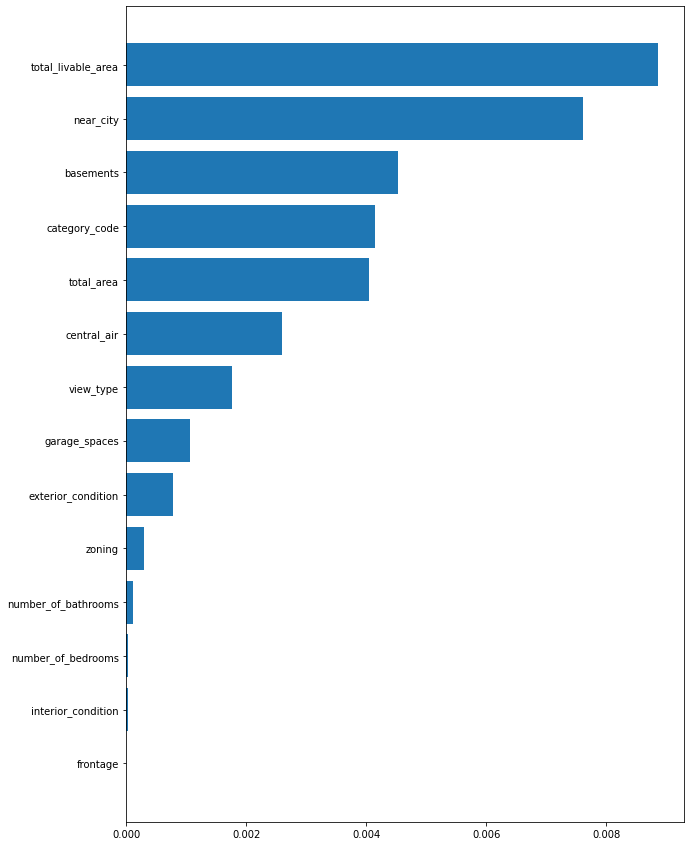

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(width=df_importances['Importance'],y=df_importances['Feature'])

From the random forest regressor, several feature importances can be extracted and used for further consideration. From this dataset, the total livable area, near_city , basement, property category code and total area are the features that have a high significance in predicting residential properties market value.


## Residual Plot

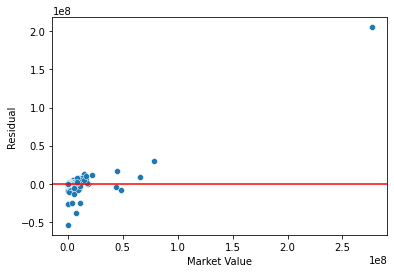

In [ ]:
sns.scatterplot(x=y_test,y=y_test-y_pred)
plt.xlabel('Market Value')
plt.ylabel('Residual')
plt.axhline(0,0,max(y_test),color='red')

In this residual plot, the points are scattered randomly around the residual=0 line. We can conclude that a random forest model provides an appropriate fit for the data. 

## Save Model

In [ ]:
import pickle
pickle.dump(estimator, open('Philadelphia Housing RandomForest.sav','wb'))

['Philadelphia RF']

# **7. Conclusion**

The conclusions derived from the EDA and data modeling stages are as follows:
- Based on the availability of residential properties in Philadelphia, residential properties are mostly found in the RSA (Residential Single-Family Attached) and RM (Residential Multi-Family) districts. Also, residential properties in the RSA and RM districts were found to have the lowest median market value. 

- The variables correlation result show that the top 3 property characteristics that influence market value include property total livable area, total area and frontage. These 3 features show that the size of a property in Philadelphia strongly influences its market value.

- The data modeling results show that size, location and facilities such as central air and condition of the basement appears to be strong predictors of property market value in Philadelphia. This result is in line with the major factors used by the Office of Property Assessment (OPA) in determining the market value of residential properties in the city of Philadelphia [OPA Property Assessments](https://www.phila.gov/departments/office-of-property-assessment/property-assessments/).

- The model built has a MAPE score of 14.80%. With this MAPE score, the model is expected to produce a good forecast. In other words, when the model is used in predicting the market value of residential properties between the range of USD200 - USD27,6892,000, the prediction result generated by the model could have a possible error rate of 14.80%.


# **8. Recommendation**

The following recommendations are provided to help the housing agent increase its potential revenue by providing an accurate and fair property value to customers. Other recommendations were also presented to further improve the model performance.<br>

For business;
1. The housing agent could recommend property located in the RSA and RM districts to buyers who seek relatively affordable housing. More affordable residential properties are most available in these districts. Hence, providing an accurate market value to customers in these districts could increase the commission received for service rendered. 

2. The housing agent could also consider acquiring vacant land in the RSA and RM districts for future housing development.

For model improvement;
1. More features such as the type of building structure, number of rooms and type of heater available in the residential property can be used to train the model. These features could influence property market value.

2. The model performance could be improved by using other hyperparameter tuning method like grid search. The grid search method tries all hyperparameter combinations. Meanwhile, in the randomized search method used in this model, not all combinations of hyperparameters are tried, but we choose randomly from all possible combinations.
